## Introduction

In this project I will examine a data frame containing server logs with data on Yandex.Afisha visits from June 2017 through May 2018 ("visits"), a data frame with all orders for said period ("orders") and a data frame with the marketing expenses statistics ("costs").

Yandex.Afisha is a ticket sales service based in Russia. Through it, visitors can purchase tickets to the cinema, theaters, concerts, exhibitions and sporting events. 

I will, hereinafter, study how people use the Yandex.Afisha product, when they start purchasing, how much money each customer brings Yandex.Afisha and whether/when Yandex.Afisha's expanses pay off - if the revenue exceeds the costs invested in attracting the potential customers.

## Description of Data

Description of the data:

The "costs" table has the following columns: 
* source_id — ad source identifier;
* dt — date;
* costs — expenses on this ad source on this day.

The "orders" table has the following columns:
* uid — unique identifier of the user making an order; 
* buy Ts — order date and time;
* revenue — Yandex.Afisha's revenue from the order.

3. The "visits" table has the following columns: 
* uid — user's unique identifier;
* device — user's device;
* start Ts — session start date and time;
* end Ts — session end date and time;
* source Id — identifier of the ad source the user came from.


## Loading and Initial Exploration of the Data

In [1]:
import pandas as pd
import random
import math as mt
import matplotlib
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from scipy import stats
from random import sample
from functools import reduce
from scipy import stats as st
from scipy.stats import levene
import matplotlib.pyplot as plt
from itertools import chain,cycle
from IPython.display import display_html

In [2]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:left"><td style="vertical-align:left">'
        html_str+=f'<h1>{title}</h1>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

Above I created a function that enables me to display tables side by side. 

In [3]:
costs = pd.read_csv('/Users/doronerlich/Desktop/Code ME/Course Project 5/costs_us.csv',parse_dates=['dt'])
orders = pd.read_csv('/Users/doronerlich/Desktop/Code ME/Course Project 5/orders_log_us.csv',parse_dates=['Buy Ts'])
visits = pd.read_csv('/Users/doronerlich/Desktop/Code ME/Course Project 5/visits_log_us.csv', dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'])

I loaded the three data frames and saved them in the costs, orders and visits variables. 

In [4]:
costs.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [5]:
orders.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [6]:
visits.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Above I printed the information of each data frame. It appears that we have no missing values and the data type of the values in each of the data frames is correct. 

In [7]:
costs.describe(include='all', datetime_is_numeric=True).fillna('N/A').T

,count,mean,min,25%,50%,75%,max,std
source_id,2542.0,4.857199,1.0,2.0,4.0,9.0,10.0,3.181581
dt,2542,2017-11-29 09:04:57.403619072,2017-06-01 00:00:00,2017-08-30 00:00:00,2017-11-29 00:00:00,2018-02-28 00:00:00,2018-05-31 00:00:00,N/A
costs,2542.0,129.477427,0.54,21.945,77.295,170.065,1788.28,156.296628


In [8]:
orders.describe(include='all', datetime_is_numeric=True).fillna('N/A').T

,count,mean,min,25%,50%,75%,max,std
Buy Ts,50415,2017-12-20 05:14:24.846176768,2017-06-01 00:10:00,2017-10-13 17:28:00,2017-12-21 14:12:00,2018-03-02 16:10:00,2018-06-01 00:02:00,N/A
Revenue,50415.0,4.999647,0.0,1.22,2.5,4.89,2633.28,21.818359
Uid,50415.0,9098160634289729536.0,313578113262317.0,4533566627250599936.0,9102273602618561536.0,13682901980465401856.0,18446167067214817280.0,5285741550834715648.0


In [9]:
visits.describe(include='all',datetime_is_numeric=True).fillna('N/A').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Device,359400,2,desktop,262567,N/A,N/A,N/A,N/A,N/A,N/A,N/A
End Ts,359400,N/A,N/A,N/A,2017-12-18 06:28:15.036205056,2017-06-01 00:02:00,2017-10-15 09:45:45,2017-12-18 18:59:30,2018-02-28 10:08:15,2018-06-01 01:26:00,N/A
Source Id,359400.0,N/A,N/A,N/A,3.750515,1.0,3.0,4.0,5.0,10.0,1.917116
Start Ts,359400,N/A,N/A,N/A,2017-12-18 06:17:32.010517760,2017-06-01 00:01:00,2017-10-15 09:41:00,2017-12-18 18:46:00,2018-02-28 09:54:00,2018-05-31 23:59:00,N/A
Uid,359400.0,N/A,N/A,N/A,9202556994354921472.0,11863502262781.0,4613406732167550976.0,9227412908740601856.0,13728237011236173824.0,18446676030785673216.0,5298432824659611648.0


From the description of each of the data frames we can learn the following:
* The names of the columns of the "orders" and "visits" data frames need to be turned to lowercase letters and spaces between words to underscores. 
* The minimum date in each of the data frames is June 1, 2017. The maximum date is either May 31, 2018, or June 1, 2018 (during the night between May 31 and June 1). 
* Each of the data frames have a different amount of columns and rows, the most substantial data frames is "visits" with 359,400 rows. 
* There are 10 source IDs and 2 types of devices, of which "desktop" is the most frequent. 

In [10]:
display_side_by_side(costs.head(), orders.head(),visits.head(), titles=['Costs', 'Orders', 'Visits'])

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005


Ahead of the preprocessing and analysis, I printed a 5 row sample of each data frame, side by side. 

**Conclusions**
* There are no missing values and the data type of the values in each of the data frames is correct.
* The names of the columns of the "orders" and "visits" data frames need to be turned to lowercase letters and spaces between words to underscores. 
* The minimum date in each of the data frames is June 1, 2017. The maximum date is either May 31, 2018, or June 1, 2018 (during the night between May 31 and June 1). 
* Each of the data frames have a different amount of columns and rows, the most substantial data frames is "visits" with 359,400 rows. 
* There are 10 source IDs and 2 types of devices, of which "desktop" is the most frequent. 

## Preprocessing of the Data

In [11]:
orders.columns = orders.columns.str.replace(' ','_').str.lower() 

Above, I turned the names of the "orders" data frame columns to lower case and changed the space between words to underscore. 

In [12]:
orders.tail()

,buy_ts,revenue,uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


I printed the tail, the final 5 rows, of the "orders" data frame. First of all, we can see that the names of the columns were altered as intended. Also, we can see that there was only one order in June 1, 2018. 

In [13]:
visits.columns = visits.columns.str.replace(' ','_').str.lower() 

Above, I turned the names of the "visits" data frame columns to lower case and changed the space between words to underscore. 

In [14]:
visits.loc[visits['end_ts'] < visits['start_ts']]

,device,end_ts,source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


In [15]:
visits.drop([4181, 177972], inplace=True)

In [16]:
visits.loc[visits['end_ts'] < visits['start_ts']]

,device,end_ts,source_id,start_ts,uid


Above, I located two rows in the "visits" data frame where the beginning of the visits was later than its end. I deleted these two rows and checked again if there are such visits in the data frame. there are none. 

In [17]:
visits.info('deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359398 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359398 non-null  category      
 1   end_ts     359398 non-null  datetime64[ns]
 2   source_id  359398 non-null  int64         
 3   start_ts   359398 non-null  datetime64[ns]
 4   uid        359398 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 14.1 MB


As we can see, now we have 359,398 rows in the "visits" data frame, instead of 359,400 rows.

**Conclusions**
* Turned the names of the "orders" data frame columns to lower case and changed the space between words to underscore.
* There was only one order in June 1, 2018.
* Turned the names of the "visits" data frame columns to lower case and changed the space between words to underscore.
* Located two rows in the "visits" data frame where the beginning of the visits was later than its end. I deleted these two rows and checked again if there are such visits in the data frame.
* In the end of this section there were 359,398 rows in the "visits" data frame, instead of 359,400 rows.

## Product Usage

In this section I will examine the users' usage of the product. Mainly, the overall number of users using the product per month, week and day and their numbers per device, the amount of overall session and per device, the overall length of each session and per device and user retention. 

### Users' Product Usage per Month, Week and Day


In [18]:
visits['session_year'] = visits['start_ts'].astype('datetime64[Y]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].astype('datetime64[D]')

Above, I created four new columns in the "visits" data frame:
* session_year - the year when the user started his/her visit (01-01-2017 or 01-01-2018);
* session_month - the first day of the month when the user started his/her visit;
* session_week - the first day of the week when the user started his/her visit;
* session_date - the visit's date (not timestamp). 

In [19]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


I printed a sample of the "visits" data frame with the new columns. We can see that the new columns are correct.

In [20]:
visits.info('deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359398 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device         359398 non-null  category      
 1   end_ts         359398 non-null  datetime64[ns]
 2   source_id      359398 non-null  int64         
 3   start_ts       359398 non-null  datetime64[ns]
 4   uid            359398 non-null  uint64        
 5   session_year   359398 non-null  datetime64[ns]
 6   session_month  359398 non-null  datetime64[ns]
 7   session_week   359398 non-null  datetime64[ns]
 8   session_date   359398 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](6), int64(1), uint64(1)
memory usage: 25.0 MB


We can see that the new columns are in the correct data type. 

In [21]:
visits['session_date'].min()

Timestamp('2017-06-01 00:00:00')

In [22]:
visits['session_date'].max()

Timestamp('2018-05-31 00:00:00')

I printed the first session date and the last session date, as stated above the dates range from June 1, 2017, till May 31, 2018. 

#### Users per Month

Hereinafter I will examine the product's monthly active users (MAU). 

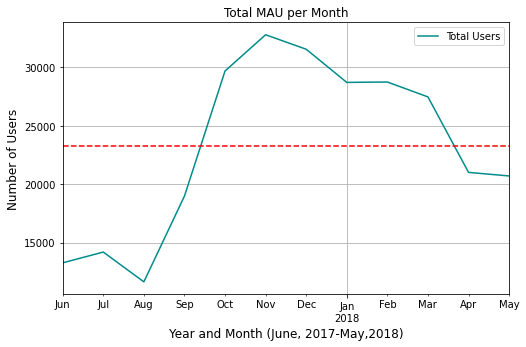

An Average of 23228 Users Used the Product per Month Between June 2017 and May 2018.


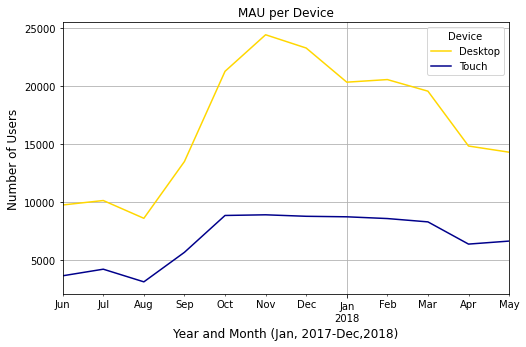

An average of 16724 users used the product using 'desktop', while an average of 6825 users Used it with 
'touch'.


In [23]:
mau = visits.groupby(['session_month']).agg({'uid': 'nunique'}).mean()
visits.groupby(['session_month']).agg({'uid': 'nunique'}).plot(grid = True, figsize = (8, 5), color='darkcyan')
plt.title('Total MAU per Month', size=12)
plt.ylabel('Number of Users', size=12)
plt.xlabel('Year and Month (June, 2017-May,2018)', size=12)
plt.legend(['Total Users'], loc='best')
plt.axhline( y=mau['uid'].mean(), ls='--',color="red")
plt.show();
print("An Average of {} Users Used the Product per Month Between June 2017 and May 2018.".format(int(mau)))
visits.pivot_table(index = ['session_month'], columns = 'device', values = 'uid', aggfunc = 'nunique').plot(grid = True, figsize = (8, 5), color=('gold', 'darkblue'))
plt.legend([ 'Desktop','Touch'], loc='best', title="Device")
plt.title('MAU per Device', size=12)
plt.ylabel('Number of Users', size=12)
plt.xlabel('Year and Month (Jan, 2017-Dec,2018)', size=12)
plt.show();
t_mau = visits.query('device == "touch"').groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
d_mau = visits.query('device == "desktop"').groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print("""An average of {} users used the product using 'desktop', while an average of {} users Used it with 
'touch'.""".format(int(d_mau), int(t_mau)))


As we can see, even though in a span of a year the product had an average of 23,228 active users per month, the number of active users in June 2017-August 2017 was well below average, dipping to its lowest point in August. Once Summer has ended the number of active users rose steadily and peaked in November-December (during the holidays). Then the number of users declines again. It should also be noted that the Russian Football League has its winter break from mid-December till March.  

Examining the number of active users per month per device, desktop and touch, we can see the same trends. However, the behavior of the desktop users is more similar to the usage of the product's total users while touch users are more steady. You can say that even though there are obviously far more desktop users than touch users, that touch users are more reliable - probably because they can access the product "on the road". However the huge difference between the number of users of each device might indicate that users find using the product with desktop more accessible than touch. This means that the user experience with touch has to improve to gain more usage. 


#### Users per Week

Hereinafter I will examine the product's weekly active users (WAU). 

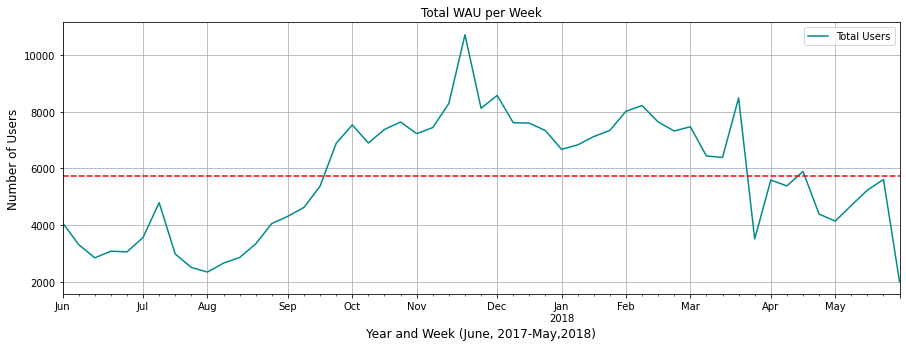

An Average of 5724 Users Used the Product per Week Between June 2017 and May 2018.


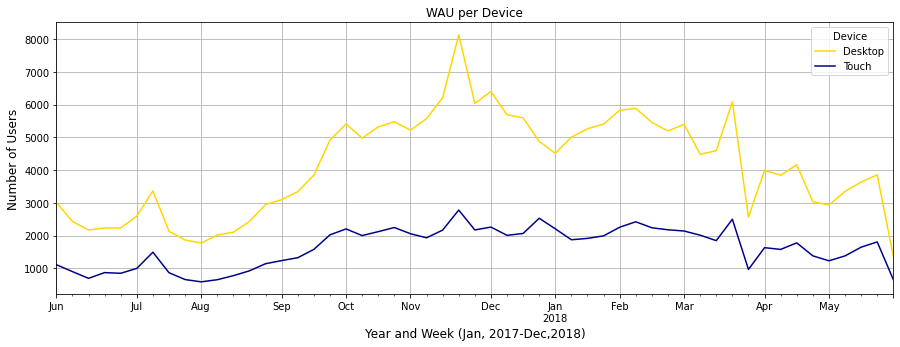

An average of 4061 users used the product using 'desktop', while an average of 1607 users used it with 
'touch'.


In [24]:
wau = visits.groupby(['session_week']).agg({'uid': 'nunique'}).mean()
visits.groupby(['session_week']).agg({'uid': 'nunique'}).plot(grid = True, figsize = (15, 5), color='darkcyan')
plt.title('Total WAU per Week', size=12)
plt.ylabel('Number of Users', size=12)
plt.xlabel('Year and Week (June, 2017-May,2018)', size=12)
plt.legend(['Total Users'], loc='best')
plt.axhline( y=wau['uid'].mean(), ls='--',color="red")
plt.show();
print("An Average of {} Users Used the Product per Week Between June 2017 and May 2018.".format(int(wau)))
visits.pivot_table(index = ['session_week'], columns = 'device', values = 'uid', aggfunc = 'nunique').plot(grid = True, figsize = (15, 5), color=('gold', 'darkblue'))
plt.legend([ 'Desktop','Touch'], loc='best', title="Device")
plt.title('WAU per Device', size=12)
plt.ylabel('Number of Users', size=12)
plt.xlabel('Year and Week (Jan, 2017-Dec,2018)', size=12)
plt.show();
t_wau = visits.query('device == "touch"').groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
d_wau = visits.query('device == "desktop"').groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print("""An average of {} users used the product using 'desktop', while an average of {} users used it with 
'touch'.""".format(int(d_wau), int(t_wau)))


Analyzing the usage per week, we can see similar trends to those per month - again there is an overall peak in mid-end November (perhaps around Black Friday). The number of users using the product declines until the beginning of the new year. The desktop users usage is similar to the overall usage while touch users provide steady usage, albeit in fewer numbers. 

Possible reasons for more users using desktop than touch especially per season, beside the user experience mentioned above, can be that during the summer months people travel and spend more time outdoors and in the harsh winter months the stay home and go to indoor events. 

The dip in usage in late March could be related to work habits. For example, companies usually release their annual reports around March. This means more work leading up to the reports, more meetings and more planning for the next year. Perhaps the users are more busy around that time and then there's Easter, another holiday, Spring and the beginning of Summer. 

#### Users per Day

Hereinafter I will examine the product's daily active users (DAU). 

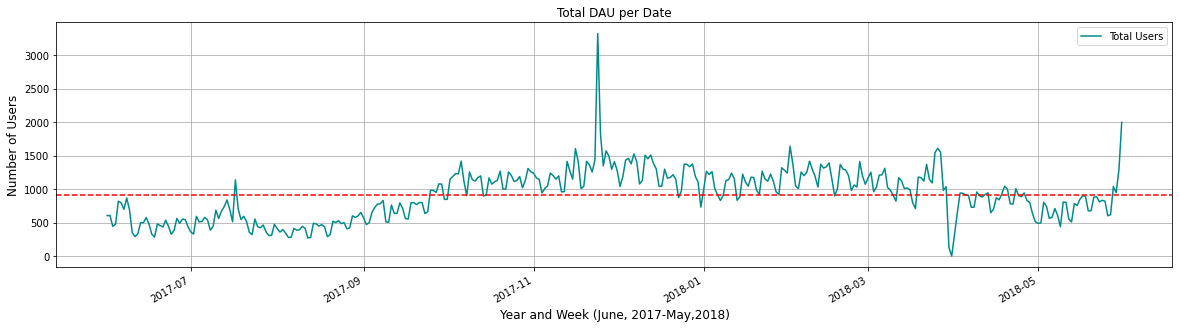

An Average of 907 Users Used the Product per Day Between June 2017 and May 2018.


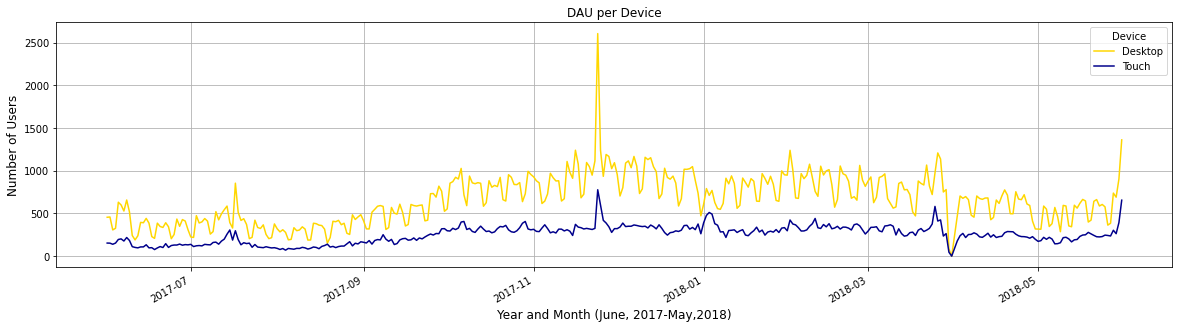

An average of 659 users used the product using 'desktop', while an average of 252 users used it with 
'touch'.


In [25]:
dau = visits.groupby(['session_date']).agg({'uid': 'nunique'}).mean()
visits.groupby(['session_date']).agg({'uid': 'nunique'}).plot(grid = True, figsize = (20, 5), color='darkcyan')
plt.title('Total DAU per Date', size=12)
plt.ylabel('Number of Users', size=12)
plt.xlabel('Year and Week (June, 2017-May,2018)', size=12)
plt.legend(['Total Users'], loc='best')
plt.axhline( y=dau['uid'].mean(), ls='--',color="red")
plt.show();
print("An Average of {} Users Used the Product per Day Between June 2017 and May 2018.".format(int(dau)))
visits.pivot_table(index = ['session_date'], columns = 'device', values = 'uid', aggfunc = 'nunique').plot(grid = True, figsize = (20, 5), color=('gold', 'darkblue'))
plt.legend([ 'Desktop','Touch'], loc='best', title="Device")
plt.title('DAU per Device', size=12)
plt.ylabel('Number of Users', size=12)
plt.xlabel('Year and Month (June, 2017-May,2018)', size=12)
plt.show();
t_dau = visits.query('device == "touch"').groupby(['session_date']).agg({'uid': 'nunique'}).mean()
d_dau = visits.query('device == "desktop"').groupby(['session_date']).agg({'uid': 'nunique'}).mean()
print("""An average of {} users used the product using 'desktop', while an average of {} users used it with 
'touch'.""".format(int(d_dau), int(t_dau)))

Again, we see the same usage trends as mention above though the sharp peak previously described is even more pronounced. Also, we can see even more clearly that touch users are far more reliable than the erratic desktop users. 

It seems as if desktop users use the product during the week, and then usage drops - perhaps just before the weekend or right after the weekend, when a new week begins. 

In [26]:
print("""The Sticky Factor, used to evaluate how stable the user base is and how regularly they visit the app, 
is {:.2f}% for DAU/MAU and {:.2f}% for DAU/WAU.""".format(float(dau/mau*100), float(dau/wau*100)))

The Sticky Factor, used to evaluate how stable the user base is and how regularly they visit the app, 
is 3.91% for DAU/MAU and 15.86% for DAU/WAU.


#### Conclusions

As noted above, the number of active users in June 2017-August 2017 was well below average, dipping to its lowest point around August. Once Summer has ended, the number of active users steadily rises and peaks in November-December (during the holidays). Then the number of users declines again.

The desktop usage is very similar to overall usage in slightly lower numbers. However, while there a far fewer touch users, they seem to be more reliable and constant users than the desktop users who seem more erratic in usage and more affected by seasonality. Touch users use the product throughout the year with a slight peak during the holidays and a slight dip in mid-late March. 

Most likely reason for such a huge difference between desktop users and touch users is the accessibility of the product with touch, i.e. **user experience**.  

### Sessions per Day


Hereinafter I will examine the users' daily sessions. 

In [27]:
sessions_per_day = visits.groupby('session_date').agg({'uid':'count'})
t_sessions_per_day = visits.query('device == "touch"').groupby('session_date').agg({'uid':'count'})
d_sessions_per_day = visits.query('device == "desktop"').groupby('session_date').agg({'uid':'count'})

In [28]:
t_sessions_per_day = t_sessions_per_day.merge(d_sessions_per_day, on='session_date')
sessions_per_day = sessions_per_day.merge(t_sessions_per_day, on='session_date')

In [29]:
sessions_per_day.rename(columns = {'uid':'total_sessions', 'uid_x':'touch_sessions', 'uid_y':'desktop_sessions'}, inplace = True)


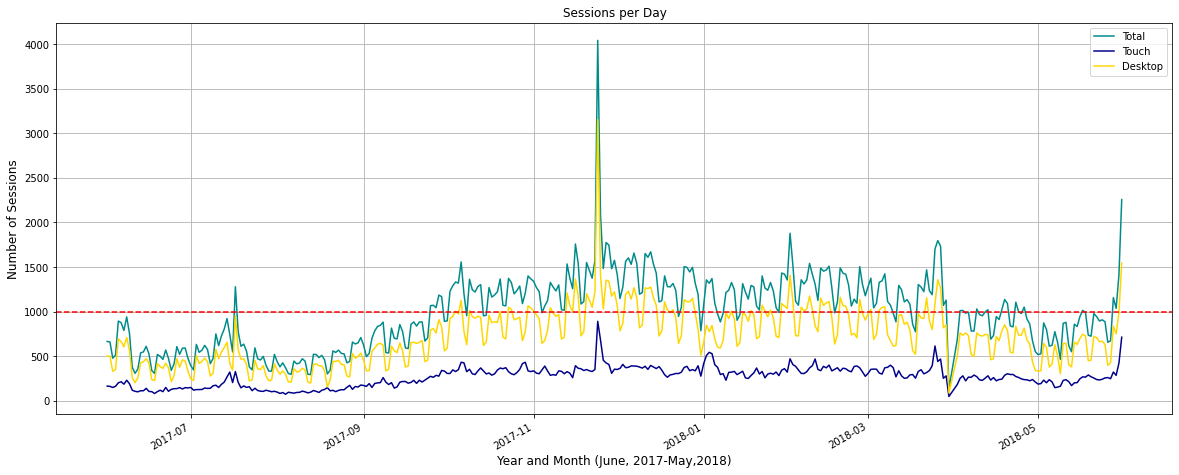


The average number of sessions per day between June 2017 and May 2018 was 990. The average number of sessions per day 
using 'desktop' was 723, while the average using 'touch' was 266. 
Again, the number of sessions per day is very similar to the number of users using the product per day, both in 
trends and the difference in both usage and number of users in desktop and touch. The only difference is in the 
overall number, especially during the holidays with approximately 4,000 sessions per day.


In [30]:
sessions_per_day.plot(grid = True, figsize = (20, 8), color=('darkcyan', 'darkblue', 'gold'))
plt.legend([ 'Total', 'Touch', 'Desktop'], loc='best')
plt.title('Sessions per Day', size=12)
plt.ylabel('Number of Sessions', size=12)
plt.xlabel('Year and Month (June, 2017-May,2018)', size =12)
plt.axhline( y=sessions_per_day['total_sessions'].mean(), ls='--',color="red")
plt.show();
print()
print("""The average number of sessions per day between June 2017 and May 2018 was {}. The average number of sessions per day 
using 'desktop' was {}, while the average using 'touch' was {}. 
Again, the number of sessions per day is very similar to the number of users using the product per day, both in 
trends and the difference in both usage and number of users in desktop and touch. The only difference is in the 
overall number, especially during the holidays with approximately 4,000 sessions per day.""".format(int(sessions_per_day['total_sessions'].mean()), int(sessions_per_day['desktop_sessions'].mean()), int(sessions_per_day['touch_sessions'].mean())))


### Sessions' Duration


Hereinafter I will examine the duration of the users' sessions. 

In [31]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [32]:
visits[['start_ts', 'end_ts', 'session_duration']].head()

,start_ts,end_ts,session_duration
0,2017-12-20 17:20:00,2017-12-20 17:38:00,1080
1,2018-02-19 16:53:00,2018-02-19 17:21:00,1680
2,2017-07-01 01:54:00,2017-07-01 01:54:00,0
3,2018-05-20 10:59:00,2018-05-20 11:23:00,1440
4,2017-12-27 14:06:00,2017-12-27 14:06:00,0


Above I created a new column in the "visits" data frame, called "session_duration". In this new column, I calculated the difference between the end of each session to its beginning and turned the difference to seconds.

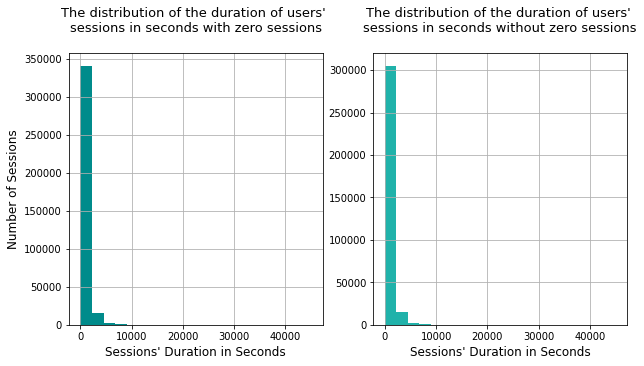

The statistics of the duration of the users' sessions are as follows:


count    359398.000000
mean        643.042287
std         997.105212
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration, dtype: float64

The statistics of the duration of the users' sessions, 0 length sessions excluded, are as follows:


count    323604.000000
mean        714.169516
std        1026.349417
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       42660.000000
Name: session_duration, dtype: float64

The Average Session Length (the ASL) is 60 seconds per visit. It should be noted that due to the distribution
of the users' sessions length, the average was calculated using 'mode'.
As we can see, the overall majority of sessions do not exceed 14-15 minutes - 840 and 900 seconds, respectively (75% of sessions). The longest session is 711 minutes long(!!!). The amount of zero seconds session is a fraction of the 
total number of sessions (35,794).


In [33]:
no_zero_sess = visits.query('session_duration > 0')['session_duration']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plot_range = (0, 45000)

# first plot: the histogram:
axs[0].hist(x = visits['session_duration'], range = plot_range,bins = 20, color='darkcyan')
axs[0].grid()
# the title:
axs[0].set_title("The distribution of the duration of users' \nsessions in seconds with zero sessions\n", size=13)
# axis labels:
axs[0].set_xlabel("Sessions' Duration in Seconds", size=12)
axs[0].set_ylabel('Number of Sessions', size=12)

# second plot: the histogram:
axs[1].hist(x = no_zero_sess, range = plot_range,bins = 20, color='lightseagreen')
axs[1].grid()
# the title:
axs[1].set_title("The distribution of the duration of users' \nsessions in seconds without zero sessions\n", size=13)
# axis labels:
axs[1].set_xlabel("Sessions' Duration in Seconds", size=12)
#axs[1].set_ylabel('Amount of Sessions', size=12)
plt.show()
print("The statistics of the duration of the users' sessions are as follows:")
display(visits['session_duration'].describe())
print("The statistics of the duration of the users' sessions, 0 length sessions excluded, are as follows:")
display(no_zero_sess.describe())
print("""The Average Session Length (the ASL) is {} seconds per visit. It should be noted that due to the distribution
of the users' sessions length, the average was calculated using 'mode'.
As we can see, the overall majority of sessions do not exceed 14-15 minutes - 840 and 900 seconds, respectively (75% of sessions). The longest session is 711 minutes long(!!!). The amount of zero seconds session is a fraction of the 
total number of sessions (35,794).""".format(int(visits['session_duration'].mode())))


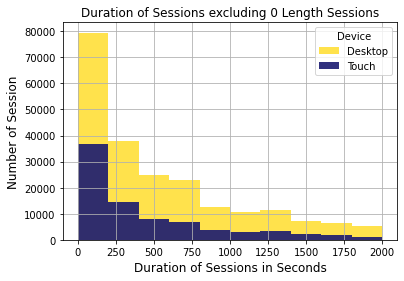

The statistics of the duration of the users' sessions, 0 length sessions excluded, are as follows:


,count,mean,std,var
device,,,,
desktop,238876,773.058516,1094.323526,1.197544e+06
touch,84728,548.142125,780.801668,6.096512e+05


The ASL for sessions using 'touch' is 60 seconds per visit, and for 'desktop' ASL is also 60. 
Again, due to the distribution of the users' sessions length, the average was calculated using 'mode'.
We can see that the distribution of the sessions' duration is fairly similar, whether the users are using desktop 
or touch, the main difference is in number of sessions - which is consistent with previous findings. Most sessions 
are no longer than 4 minutes (240 seconds).


In [34]:
visits_with_duration = visits[visits['session_duration'] > 0]
touch_visits = visits_with_duration[visits_with_duration['device'] == 'touch']
desktop_visits = visits_with_duration[visits_with_duration['device'] == 'desktop']
plt.title('Duration of Sessions excluding 0 Length Sessions',fontsize=12)
desktop_visits['session_duration'].hist(range=(0,2000), alpha=0.7, color = "gold")
touch_visits['session_duration'].hist(range=(0,2000), alpha=0.9, color = "midnightblue")
plt.legend([ 'Desktop','Touch'], loc='best', title="Device")
plt.xlabel("Duration of Sessions in Seconds",size=12)
plt.ylabel("Number of Session",size=12)
plt.show()
print("The statistics of the duration of the users' sessions, 0 length sessions excluded, are as follows:")
display(visits_with_duration.groupby(['device'])['session_duration'].agg(['count', 'mean', 'std', 'var']))
print("""The ASL for sessions using 'touch' is {} seconds per visit, and for 'desktop' ASL is also {}. 
Again, due to the distribution of the users' sessions length, the average was calculated using 'mode'.
We can see that the distribution of the sessions' duration is fairly similar, whether the users are using desktop 
or touch, the main difference is in number of sessions - which is consistent with previous findings. Most sessions 
are no longer than 4 minutes (240 seconds).""".format(int(touch_visits['session_duration'].mode()), int(desktop_visits['session_duration'].mode())))

### User Retention Rate


Hereinafter I will examine the users' retention rate.

In [35]:
first_visit = visits.groupby(['uid'])['start_ts'].min()
first_visit.name = 'first_visit'
visits = visits.merge(first_visit,on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00


I created a slice of the data frame with each users first visit to the product and named it "first_visit". Thenm I merged it onto the "visits" data frame on the "uid" column, I printed a sample of the merged data frame. 

In [36]:
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['cohort_lifetime'] = (((visits['session_month'] - visits['first_visit_month']))/np.timedelta64(1, 'M')).round().astype(int)

I created a new column using the month of the user's first visit and then subtracted it from the month of the session to find when, after first using the product, did the users use the product again - I saved the difference in the column "cohort_lifetime".  

In [37]:
cohorts = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index() 
cohorts.head()

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


I grouped the number of unique users by the month of their first visit and their cohort lifetime and saved it in the "cohorts" variable.  

In [38]:
initial_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_count = initial_count.rename(columns={'uid': 'cohort_users'})
initial_count

,first_visit_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [39]:
cohorts = cohorts.merge(initial_count, on='first_visit_month')

I created a new variable called "initial count" where the number of cohort users are lifetime "0" - they are the cohort size. Then, I merged the "cohorts" and "initial count" data frames so it has both the initial cohort size and the number of users each month (on each of the cohort lifetime). 

In [40]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
cohorts

,first_visit_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


I divided the number of users from the cohort who visited in each subsequent month by the cohort size and saved the results in the "retention" column. As we can see, each cohort's first lifetime (0) has 100%, the ratio of subsequent users is a percentage of the initial cohort size. 

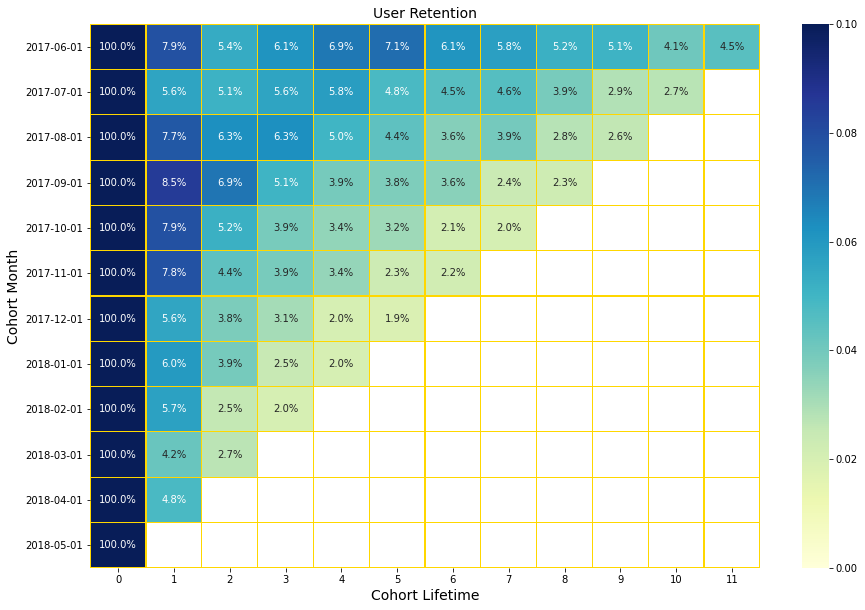

In [41]:
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

retention_pivot.index = retention_pivot.index.astype(str)

plt.figure(figsize=(15, 10))
plt.title('User Retention', size=14)
sns.heatmap(retention_pivot,annot=True,fmt='.1%',linewidths=.1,linecolor='gold',cmap="YlGnBu", vmin=0, vmax=0.1)
plt.xlabel("Cohort Lifetime", size=14) 
plt.ylabel("Cohort Month", size=14) 
plt.show()

Above, I created a pivot table presented in a heatmap. 
The June 2017 cohort has the longest lifetime, until May, 2018.
We can see the same trends as with the number of users using the product and the number of sessions per day.
First of all, retention drops after the initial cohort month (0). In the holiday months retention rises, especially for the first cohort (June 2017), where retention rate starts to rise in cohort lifetime 3 (September), through cohort lifetime 4 and 5, October and November, respectively. This is the same for July 2017 cohort only in lower numbers. Retention rate is also quite high for the cohorts leading up to the holidays and the holidays cohorts, while the retention rate after the holidays (beginning in January 2018), is low.  

### Conclusions

**Number of Users and Usage** 
* The number of active users in June 2017-August 2017 was well below average, dipping to its lowest point around August. Starting in the Fall, around September, the number of active users steadily rises and peaks in November-December (during the holidays). Then the number of users declines again in January.
* The desktop usage is very similar to overall usage in slightly lower numbers. 
* Even though there a far fewer touch users, they seem to be more reliable and constant users than the desktop users who seem more erratic in usage and more affected by seasonality. Touch users use the product throughout the year with a slight peak during the holidays and a slight dip in mid-late March.

**Sessions' Lengths**

* Most likely reason for such a huge difference between desktop users and touch users is the accessibility of the product with touch, i.e. **user experience**. 
* The overall majority of sessions do not exceed 14-15 minutes - 840 and 900 seconds, respectively (75% of sessions). * The longest session a user had is 711 minutes long (probably a fluke). 
* The amount of zero seconds session is a fraction of the total number of sessions (35,794).
* ASL for both desktop and touch sessions is 60 seconds (1 minute). 
* The distribution of the sessions' duration is fairly similar, whether the users are using desktop or touch, the main difference is in the number of sessions - which is consistent with previous findings. 
* Most sessions are no longer than 4 minutes (240 seconds).

**Retention**

* The same trends as with the number of users using the product per Month/Week/Day and the number of sessions per day.
* Retention usually drops dramatically after the initial cohort month (0). 
* In the holiday months retention rises, especially for the first cohort (June 2017), where retention rate starts to rise in cohort lifetime 3 (September), through cohort lifetime 4 and 5, October and November, respectively. 
* Retention rate is also quite high for the cohorts leading up to the holidays and the holidays cohorts, while the retention rate after the holidays (beginning in January 2018), is low.


## Product Sales

In this section I will examine the users' orders using the product, when they turn from users to customers. Mainly, the customers' conversion rate, the amount of orders the customers made over time and their size and the customers' lifetime value. 

### User to Customer, AKA Conversion Rate 


Hereinafter I will examine the users' conversion rate. 

In [42]:
first_order = orders.groupby(['uid']).agg({'buy_ts': 'min'}).reset_index()
first_visit = visits.groupby(['uid']).agg({'start_ts': 'min'}).reset_index()

In [43]:
first_visit_order = first_visit.merge(first_order, on='uid')
first_visit_order.columns = ['uid', 'first_visit_month', 'first_order_month']
first_visit_order

,uid,first_visit_month,first_order_month
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00


Above I created two new tables - one with each user's first purchase and one with their first visit and merged them into one table called "first visit order", and renamed the columns to reflect their content. 

In [44]:
first_visit_order['first_visit_month'] = first_visit_order['first_visit_month'].astype('datetime64[M]') 
first_visit_order['first_order_month'] = first_visit_order['first_order_month'].astype('datetime64[M]')
first_visit_order['days_to_conversion'] = first_visit_order['first_order_month']-first_visit_order['first_visit_month']
first_visit_order['conversion']=(first_visit_order['days_to_conversion']/np.timedelta64(1,'D')).astype('int')


In [45]:
first_visit_order

,uid,first_visit_month,first_order_month,days_to_conversion,conversion
0,313578113262317,2017-09-01,2018-01-01,122 days,122
1,1575281904278712,2017-06-01,2017-06-01,0 days,0
2,2429014661409475,2017-10-01,2017-10-01,0 days,0
3,2464366381792757,2018-01-01,2018-01-01,0 days,0
4,2551852515556206,2017-11-01,2017-11-01,0 days,0
...,...,...,...,...,...
36518,18445147675727495770,2017-08-01,2017-11-01,92 days,92
36519,18445407535914413204,2017-09-01,2017-09-01,0 days,0
36520,18445601152732270159,2017-08-01,2018-03-01,212 days,212
36521,18446156210226471712,2017-11-01,2018-02-01,92 days,92


I turned the first visit and first order dates to months (first day of the month, the month and year), and subtracted the first visit month from the first order month and saved the result in the "days to conversion" column and turn the difference to days. I will hereinafter group the users by their days to conversion. 

display(first_visit_order.groupby('conversion').agg({'uid':'count'}))

print("""A total of {} users visited the product and only {} of these users placed orders. 
As such, the conversion rate is {:.2%}. The lion's share of the orders (30,087 orders), {:.2%}, were placed in the 
users' first visit.""".format(visits['uid'].nunique(), orders['uid'].nunique(), (orders['uid'].nunique()/visits['uid'].nunique()), (30087/orders['uid'].nunique())))


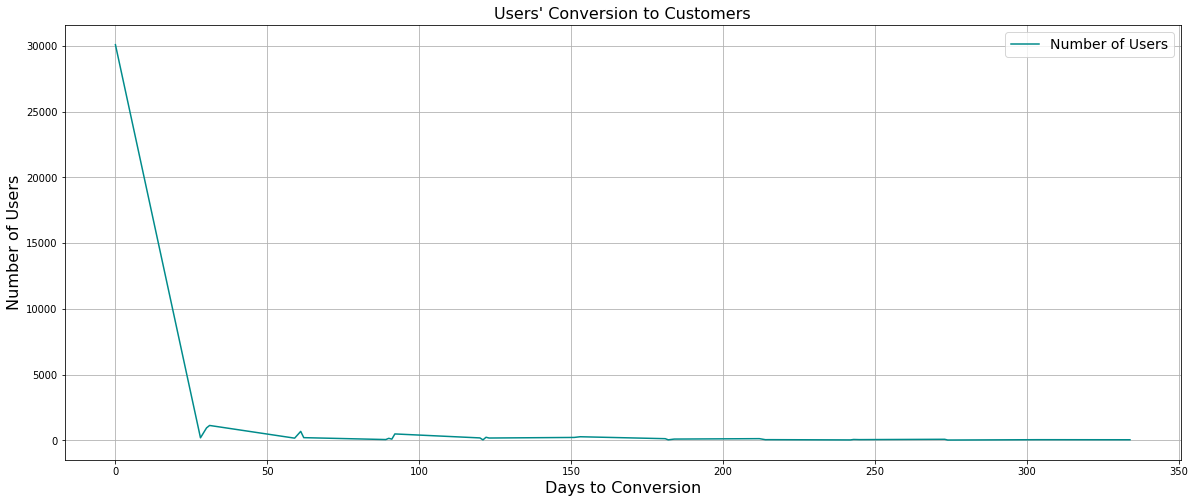


A total of 228169 users visited the product and only 36523 of these users placed orders. 
As such, the conversion rate is 16.01%. The lion's share of the orders (30,087 orders), 82.38%, were 
placed in the users' first visit. 

The average time it takes a user to become a customer is 16.6 days.


In [46]:
conversion = first_visit_order.groupby('conversion').agg({'uid':'count'}).sort_values(by="conversion")
first_visit_order['conversion']=(first_visit_order['days_to_conversion']/np.timedelta64(1,'D')).astype('int')
conversion.plot(grid = True, figsize = (20, 8), color='darkcyan')
plt.title("Users' Conversion to Customers", size=16)
plt.ylabel('Number of Users', size=16)
plt.xlabel('Days to Conversion', size=16)
plt.legend(['Number of Users'], loc='best', fontsize=14)
plt.show();
print()
print("""A total of {} users visited the product and only {} of these users placed orders. 
As such, the conversion rate is {:.2%}. The lion's share of the orders (30,087 orders), {:.2%}, were 
placed in the users' first visit. 

The average time it takes a user to become a customer is {:.1f} days.""".format(visits['uid'].nunique(), orders['uid'].nunique(), (orders['uid'].nunique()/visits['uid'].nunique()), (30087/orders['uid'].nunique()), first_visit_order['conversion'].mean()))


### Amount of Orders in a Given Period of Time


Hereinafter I will examine the number of orders users' placed in a given period of time. 

In [47]:
orders['order_year'] = orders['buy_ts'].astype('datetime64[Y]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]') 
orders['order_week'] = orders['buy_ts'].astype('datetime64[W]')
orders['order_date'] = orders['buy_ts'].astype('datetime64[D]')
first_order.columns = ['uid', 'first_order']
orders = orders.merge(first_order,on='uid') 

I created four new columns in the "orders" data frame, "order year", "order month", "order week" and "order date". I renamed the columns in the previously created "first order" table and merged it with the "orders" data frame. 

In [48]:
orders['first_order_month'] = orders['first_order'].astype('datetime64[M]')
orders['cohort_lifetime'] = ((orders['order_month'] - orders['first_order_month'])/ np.timedelta64(1, 'M')).round().astype(int)


Once the tables were merged, I created a new column called "first order month", with the month of each user's first order. Then I created a new column, "cohort lifetime", with the difference between each user's order month and the month of the first placed order. 

In [49]:
cohorts_o = (orders.groupby(['first_order_month', 'cohort_lifetime']).agg({'uid': 'nunique', 'order_month':'count'}).reset_index()) 
initial_count_o = cohorts_o[cohorts_o['cohort_lifetime'] == 0][['first_order_month', 'uid']]
initial_count_o = initial_count_o.rename(columns={'uid': 'co_uid'})


I grouped the "first order month" and "cohort lifetime" columns, counted the unique number of users and the number of orders placed. I saved the results in a new table, "cohorts o". Then I created another table with only the 0 cohort lifetime number of unique users of each cohort and renamed the column "co uid". 

In [50]:
cohorts_o = cohorts_o.merge(initial_count_o, on='first_order_month')
cohorts_o = cohorts_o.rename(columns={'order_month': 'n_orders'})
cohorts_o['orders_per_user'] = (cohorts_o['n_orders']/cohorts_o['co_uid'])
cohorts_o.head()

,first_order_month,cohort_lifetime,uid,n_orders,co_uid,orders_per_user
0,2017-06-01,0,2023,2354,2023,1.163618
1,2017-06-01,1,61,177,2023,0.087494
2,2017-06-01,2,50,174,2023,0.086011
3,2017-06-01,3,54,226,2023,0.111715
4,2017-06-01,4,88,292,2023,0.144340


I merged the "cohorts o" and the "initial count o" tables, rename the "order month" column to reflect the number of orders placed in each month and divided the number of orders placed by the cohort size. I saved the results in the column "orders per user" and printed a sample of the table. 

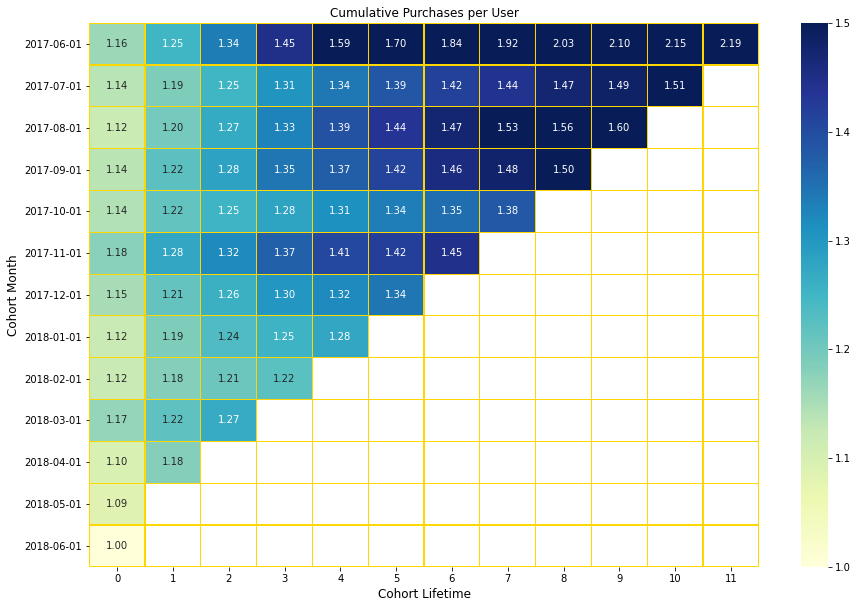


The average daily numbers: 127 users and and 138 orders. 
The average weekly numbers: 818 users and and 951 orders. 
The average monthly numbers: 3155 users and and 3878 orders.


In [51]:
cohorts_o_pivot = cohorts_o.pivot_table(index='first_order_month', columns='cohort_lifetime', 
                                        values='orders_per_user', aggfunc='sum').cumsum(axis=1)

cohorts_o_pivot.index = cohorts_o_pivot.index.astype(str)
plt.figure(figsize=(15, 10))
plt.title('Cumulative Purchases per User', size=12)
sns.heatmap(cohorts_o_pivot,annot=True,fmt='.2f',linewidths=.1,linecolor='gold',cmap="YlGnBu", vmin=1, vmax=1.5)
plt.xlabel("Cohort Lifetime", size=12) 
plt.ylabel("Cohort Month", size=12) 
plt.show()
print()
import warnings
warnings.filterwarnings('ignore')
week = orders.groupby('order_week')['uid'].count().reset_index()
week_u = orders.groupby('order_week')['uid'].nunique().reset_index().mean()
print("""The average daily numbers: {} users and and {} orders. 
The average weekly numbers: {} users and and {} orders. 
The average monthly numbers: {} users and and {} orders."""
      .format(int(orders.groupby('order_date')['uid'].nunique().reset_index().mean()), int(orders.groupby('order_date')['uid'].count().reset_index().mean())
, int(week_u['uid'].mean()), int(week['uid'].mean()), int(orders.groupby('order_month')['uid'].nunique().reset_index().mean())
, int(orders.groupby('order_month')['uid'].count().reset_index().mean())))

Above we can see the cumulative number of purchases per customer of each cohort throughout the cohort lifetime. The customers of the June 2017 cohort had the most cumulative number of orders per customer, but from around March 2018 (cohort lifetime 8) the number of orders decreased (after peaking in October-December 2018). For cohort August 2017, the biggest rise in the number of orders per customer was in September and October 2017, and for the November 2017 cohort - December 2017. Again, most order are made in the first lifetime of each cohort.

### Average Order Size


Hereinafter I will examine the average order size per month and per cohort. 

#### Average Order Size per Month

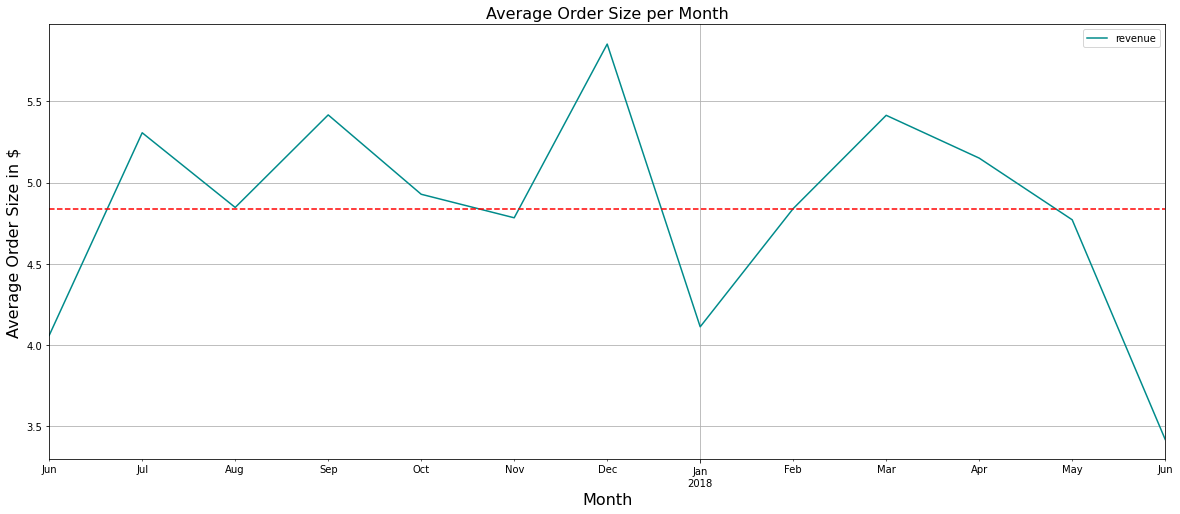

As we can see, December had the highest average order size, with March 2018, September 2017 and July 2017 coming in 2nd, 3rd and 4th, respectively - all above the overall average order size per month. 
October and August's average order size were slightly above the overall average order size per month and 
November slighlty below. June 2017 and January 2018 had the lowest average order size.


In [52]:
avg_orders_month = orders.pivot_table(index='order_month', values='revenue', 
                                        aggfunc='mean')
avg_orders_month.plot(grid = True, figsize = (20, 8), color='darkcyan')
plt.title("Average Order Size per Month", size=16)
plt.ylabel('Average Order Size in $', size=16)
plt.xlabel('Month', size=16)
plt.axhline( y=avg_orders_month['revenue'].mean(), ls='--',color="red")
plt.show();
print("""As we can see, December had the highest average order size, with March 2018, September 2017 and July 2017 coming in 2nd, 3rd and 4th, respectively - all above the overall average order size per month. 
October and August's average order size were slightly above the overall average order size per month and 
November slighlty below. June 2017 and January 2018 had the lowest average order size.""")


#### Average Order Size per Cohort

In [53]:
cohorts_r = (orders.groupby(['first_order_month', 'cohort_lifetime']).agg({'revenue': 'mean'}).reset_index()) 
cohorts_r

,first_order_month,cohort_lifetime,revenue
0,2017-06-01,0,4.060106
1,2017-06-01,1,5.547006
2,2017-06-01,2,5.088161
3,2017-06-01,3,8.545575
4,2017-06-01,4,7.084178
...,...,...,...
74,2018-03-01,2,6.334489
75,2018-04-01,0,4.248774
76,2018-04-01,1,6.204718
77,2018-05-01,0,4.286168


Above I created a table with each cohort's average revenue in each lifetime. 

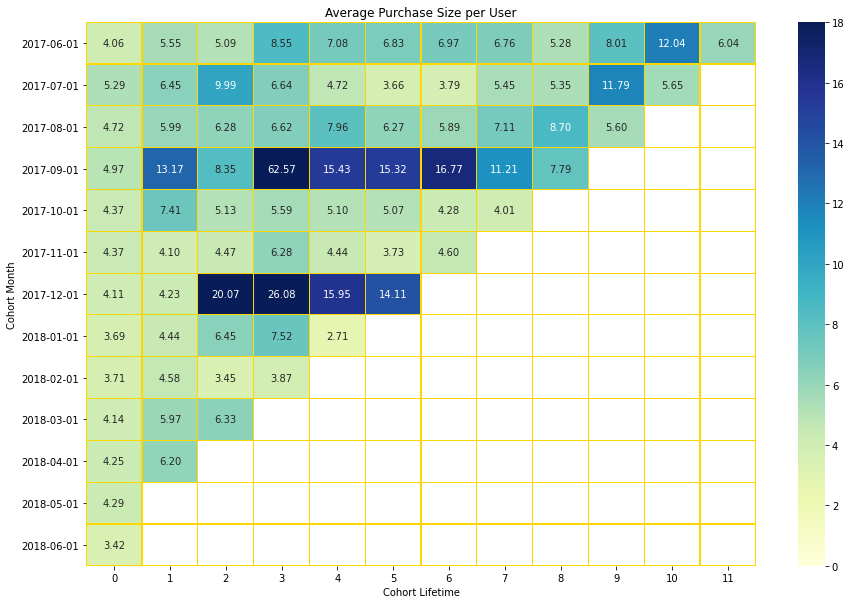

In [54]:
cohorts_r_pivot = cohorts_r.pivot_table(index='first_order_month', columns='cohort_lifetime', values='revenue', 
                                        aggfunc='mean')
cohorts_r_pivot.index = cohorts_r_pivot.index.astype(str)
plt.figure(figsize=(15, 10))
plt.title('Average Purchase Size per User')
sns.heatmap(cohorts_r_pivot,annot=True,fmt='.2f',linewidths=.1,linecolor='gold',cmap="YlGnBu", vmin=0, vmax=18)
plt.xlabel("Cohort Lifetime") 
plt.ylabel("Cohort Month") 
plt.show()

As we can the average order size of each cohort is fairly similar. However, there are some cohorts who had higher than average order sizes - for example:
* Lifetimes 9 and 10 (March-April 2017) of the June 2017 cohort.
* Lifetimes 2 and 9 (September and April 2017) of the July 2017 cohort. 
* Practically all of the September 2017 cohort lifetimes (October, 2017-April, 2018).
* Lifetimes 2-5 of the December 2017 cohort (February-May 2018).

One possible reason for the aforementioned is that some users made very expansive purchases. Overall, it seems that the September 2017 and December 2017 cohorts had the highest average order sizes of all cohorts.


### Customers' Lifetime Value (LTV)

Hereinafter I will examine the customers' Lifetime Value (LTV). LTV is the total amount of money a customer brings to the company on average by making purchases.


In [55]:
cohort_s = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_s.columns = ['first_order_month', 'n_buyers']
cohort_s.head() 

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Above I created a table with the size of each cohort called "cohort s" and renamed the table's columns.

In [56]:
cohort_ltv = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohort_ltv.columns = ['first_order_month', 'order_month', 'revenue']
cohort_ltv = cohort_ltv.merge(cohort_s, on='first_order_month')
cohort_ltv

,first_order_month,order_month,revenue,n_buyers
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533
75,2018-04-01,2018-04-01,10600.69,2276
76,2018-04-01,2018-05-01,1209.92,2276
77,2018-05-01,2018-05-01,13925.76,2988


I created another table grouping the "first order month" and "order month" columns and the aggregated revenue for each order month. I merged the "cohort s" and "cohort ltv" tables and printed a sample of the table.  

In [57]:
cohort_ltv['cohort_lifetime'] = ((cohort_ltv['order_month'] - cohort_ltv['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')


As previously, I created a column with each cohort's lifetime buy subtracting the first order month from the order month. 

In [58]:
cohort_ltv['ltv'] = cohort_ltv['revenue'] / cohort_ltv['n_buyers']
cohort_ltv.head()


,first_order_month,order_month,revenue,n_buyers,cohort_lifetime,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531


In the "cohort ltv" table I created a new column called "ltv" by dividing the revenue by the number of buyers. 
Usually, the gross profit (revenue multiplied by the margin rate) is divided by the number of buyers, but since we don't have any information regarding the margin rate the gross profit is the revenue. 

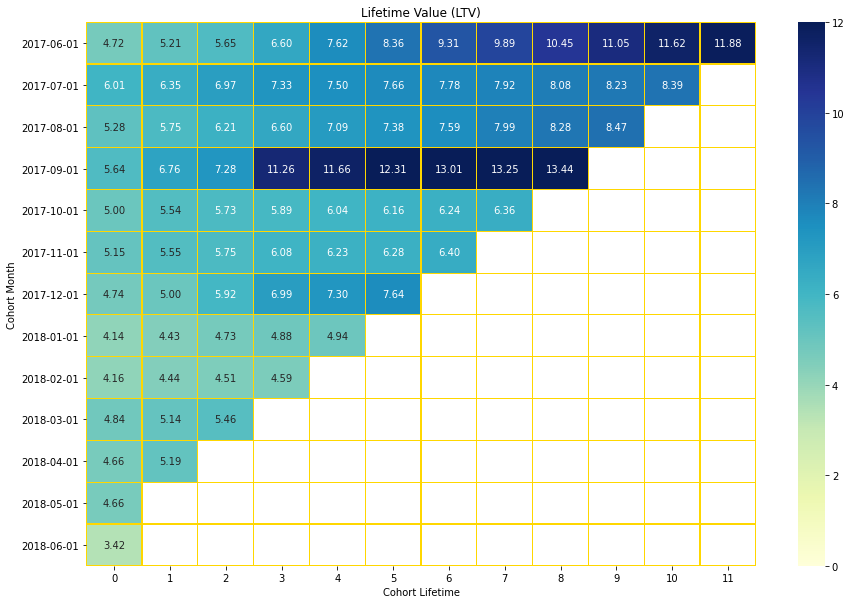


Each of the cohorts' highest LTV is in the first lifetime month. 
For the June 2017 cohort, LTV declined in the second and third lifetime months and rose again from 
September to December. The September 2017 cohort's LTV was high on the second month in October, dipped, 
and then rose again in December when it also recorded the highest average purchase size per user. 
At the same time, the February 2018 cohort recorded one of the lowest LTV. The October 2017 and November
2017 cohorts had very low ltv after the first lifetime month, especially in April 2018.

Total LTV per Cohort:
first_order_month
2017-06-01    102.36
2017-07-01     82.22
2017-08-01     70.64
2017-09-01     94.61
2017-10-01     46.96
2017-11-01     41.44
2017-12-01     37.59
2018-01-01     23.12
2018-02-01     17.70
2018-03-01     15.44
2018-04-01      9.85
2018-05-01      4.66
2018-06-01      3.42
dtype: float64

As we can see, the customers of the September 2017 cohort brought the company, on average, 
the highest re

In [59]:
cohort_ltv_pivot = cohort_ltv.pivot_table(index='first_order_month', columns='cohort_lifetime', values='ltv', aggfunc='mean').cumsum(axis=1).round(2)

cohort_ltv_pivot.index = cohort_ltv_pivot.index.astype(str)
plt.figure(figsize=(15, 10))
plt.title('Lifetime Value (LTV)')
sns.heatmap(cohort_ltv_pivot,annot=True,fmt='.2f',linewidths=.1,linecolor='gold',cmap="YlGnBu", vmin=0, vmax=12)
plt.xlabel("Cohort Lifetime") 
plt.ylabel("Cohort Month") 
plt.show()
print("""
Each of the cohorts' highest LTV is in the first lifetime month. 
For the June 2017 cohort, LTV declined in the second and third lifetime months and rose again from 
September to December. The September 2017 cohort's LTV was high on the second month in October, dipped, 
and then rose again in December when it also recorded the highest average purchase size per user. 
At the same time, the February 2018 cohort recorded one of the lowest LTV. The October 2017 and November
2017 cohorts had very low ltv after the first lifetime month, especially in April 2018.

Total LTV per Cohort:
{}

As we can see, the customers of the September 2017 cohort brought the company, on average, 
the highest revenue. A close second is the June 2017, even though it had the longest cohort lifetime.

""".format(cohort_ltv_pivot.sum(axis=1).round(2)))


### Conclusions

**Conversion Rate** 
* A total of 228,169 users visited the product and only 36523 of these users placed orders - the conversion rate is 16.01%. 
* 82.38% of orders were placed in the users' first visit.
* The average time it takes a user to become a customer is 16.6 days.

**Orders per Period**

* The average daily numbers: 127 users and and 138 orders. 
* The average weekly numbers: 818 users and and 951 orders. 
* The average monthly numbers: 3155 users and and 3878 orders.
* Most order are made in the first lifetime of each cohort.
* The customers of the June 2017 cohort had the most cumulative number of orders per customer, but from around March 2018 (cohort lifetime 8) the number of orders decreased (after peaking in October-December 2018). 
* For cohort August 2017, the biggest rise in the number of orders per customer was in September and October 2017, and for the November 2017 cohort - December 2017.

**Average Order Size**
    
* December had the highest average order size, with March 2018, September 2017 and July 2017 coming in 2nd, 3rd and 4th, respectively - all above the overall average order size per month. 
October and August's average order size were slightly above the overall average order size per month and 
November slighlty below. June 2017 and January 2018 had the lowest average order size.
* The average order size of each cohort is fairly similar. 
* There are some cohorts with higher than average order sizes (e.g., the June 2017 cohort, the July 2017 cohort, the September 2017 cohort and the December 2017 cohort). 
* Possible explanation for the aforementioned is few users who made more expansive purchases.
* The September 2017 and December 2017 cohorts had the highest average order sizes of all cohorts.



**LTV**

* Each of the cohorts' highest LTV is in the first lifetime month. 
* The customers of the September 2017 cohort brought the company, on average, the highest revenue. 
* A close second is the June 2017, even though it had the longest cohort lifetime.


## Marketing Investment

In this section I will examine the company's marketing investment - marketing overall costs/per source, customer acquisition cost (CAC) and return on investment (ROI). 

### Cost of Overall Marketing/Per Source

In [60]:
costs['dt_year'] = costs['dt'].astype('datetime64[Y]')
costs['dt_month'] = costs['dt'].astype('datetime64[M]')
costs['dt_week'] = costs['dt'].astype('datetime64[W]')

From the "dt" column in the "costs" data frame I created three new columns:
* dt_year;
* dt_month;
* dt_week.


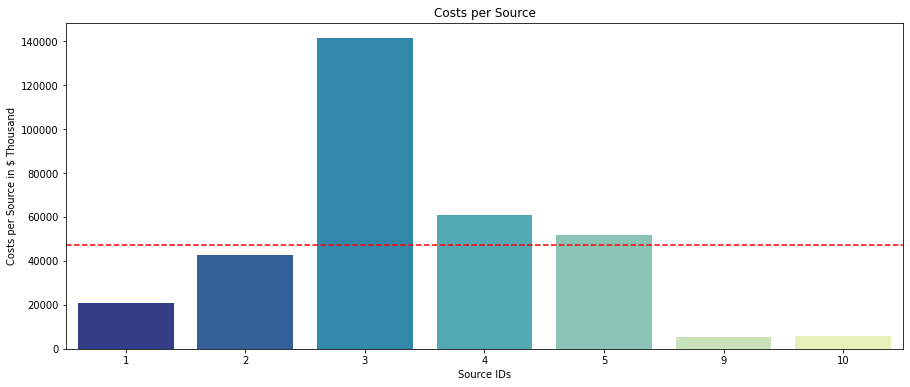

Total costs between June, 2017, and June, 2018, were $329131.62. The average costs were 47018.80 and per day 
they were $904.21.


In [61]:
costs_pivot = costs.groupby(['source_id']).agg({'costs': 'sum'}).reset_index()
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='source_id',y="costs", palette=sns.color_palette('YlGnBu_r', 7), data=costs_pivot)
plt.title("Costs per Source")
plt.xlabel("Source IDs")
plt.ylabel("Costs per Source in $ Thousand")
plt.axhline( y=costs_pivot['costs'].mean(), ls='--',color="red")
plt.show()

print("""Total costs between June, 2017, and June, 2018, were ${}. The average costs were {:.2f} and per day 
they were ${:.2f}.""".format(costs['costs'].sum(),costs_pivot['costs'].mean(), costs['costs'].sum()/costs['dt'].nunique()))


As we can see 3 sources' costs were above average (sources 3, 4 and 5) with source 3 being the most expansive, and by a lot. Sources 2, 4 and 5 are either slightly below average or slightly above average and sources 1, 9 and 10 are the least expansive.

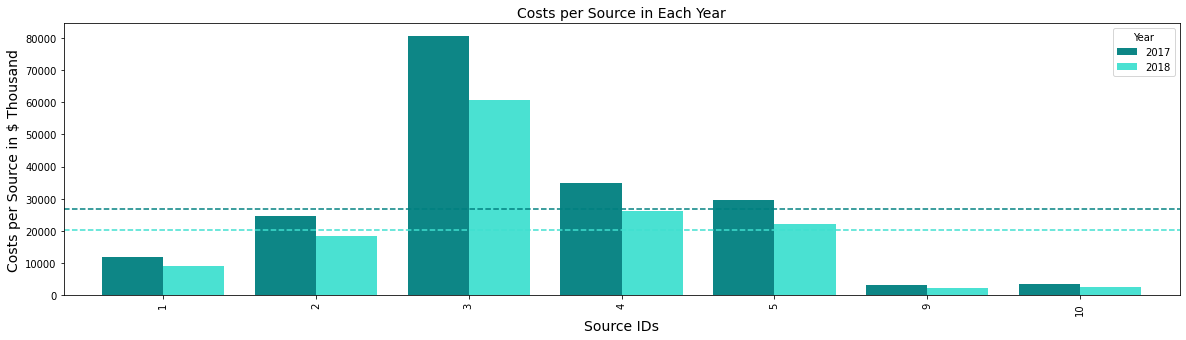

In [62]:
year = costs.pivot_table(index='source_id', columns=['dt_year'], values = 'costs',aggfunc=('sum'))
year.plot(figsize=(20,5),alpha=0.95, align='center', width = 0.8,kind='bar', 
                                                                                                         color = ("teal", "turquoise"))
plt.title("Costs per Source in Each Year",size=14)
plt.xlabel("Source IDs",size=14)
plt.ylabel("Costs per Source in $ Thousand",size=14)
plt.legend(['2017','2018'], loc='best', title="Year")
plt.axhline( y=year['2017-01-01'].mean(), ls='--',color="teal")
plt.axhline( y=year['2018-01-01'].mean(), ls='--',color="turquoise")
plt.show()


Examining the costs of each source per year we can see the each of the most expansive sources were the most expansive both in 2017 and in 2018, and that consistently, 2017 was more expansive for all source than 2018. Sources 3, 4 and 5's costs were above average in each year. 

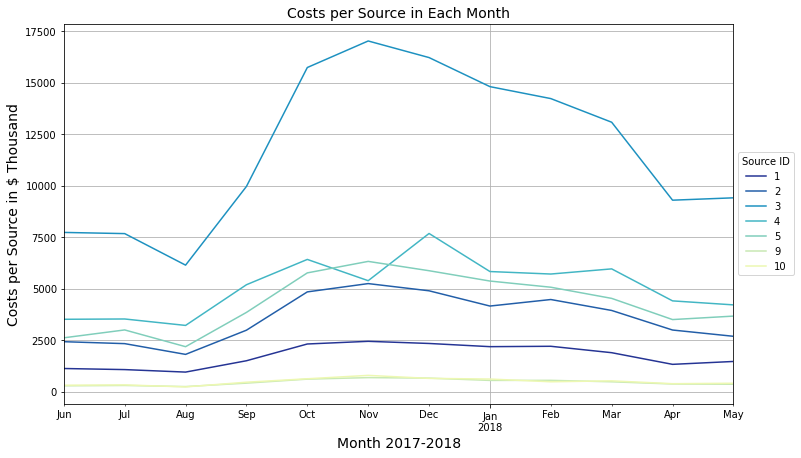

Each Source's Average Monthly Cost: 
source_id
1      1736.105833
2      3567.170000
3     11776.802500
4      5089.466667
5      4313.091667
9       459.790833
10      485.207500
dtype: float64


In [63]:
costs.pivot_table(index='dt_month', columns=['source_id'], values = 'costs',aggfunc=('sum')).plot(grid = True, figsize = (12, 7), color = sns.color_palette('YlGnBu_r', 7))
plt.title("Costs per Source in Each Month",size=14)
plt.xlabel("Month 2017-2018",size=14)
plt.ylabel("Costs per Source in $ Thousand",size=14)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), title="Source ID")
plt.show()

month = costs.pivot_table(index='dt_month', columns=['source_id'], values = 'costs',aggfunc=('sum'))
print("""Each Source's Average Monthly Cost: 
{}""".format(month.mean()))


Examining the monthly costs for each source, we can see that:
* Sources 1, 2 and 10 were the least expansive sources, consistently. With sources 1 and 2 expanses rising from August to January, source 2 dipping slightly in January and then both mostly declining in expanses. 
* Source 3 is the most expansive, with costs dipping in August and then costs hike and peak in November only to start declining. 
* Sources 4 and 5 are the second and third most expansive sources, with source 4's costs dipping in November and peaking in October, December and March, while source 5's costs were the highest in November and the lowest in August. 
* Overall, other than source 10, we can see that for all sources, the least amount of costs invested were in August and April.
* We can see that source 3 had the highest average monthly costs, more than twice as much as the second highest (source 4) and almost 3 times as the 3rd highest (source 5). The source with the lowest average monthly cost was source 9.  

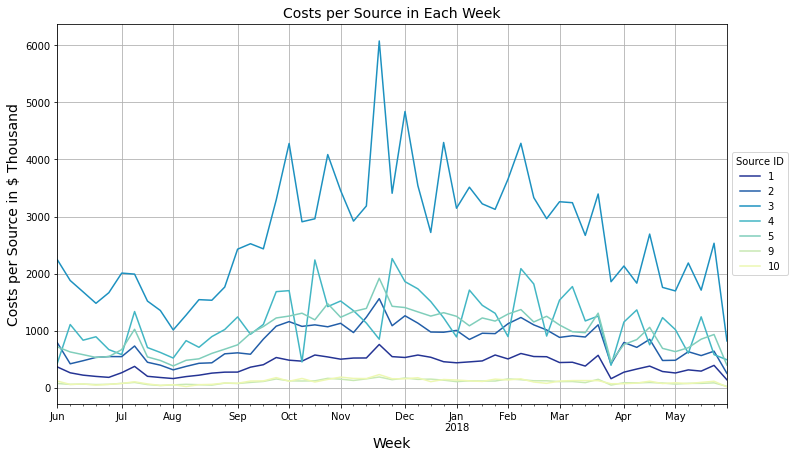

Each Source's Average Weekly Cost: 
source_id
1      393.080566
2      807.661132
3     2666.445849
4     1152.332075
5      976.549057
9      104.103585
10     109.858302
dtype: float64


In [64]:
costs.pivot_table(index='dt_week', columns=['source_id'], values = 'costs',aggfunc=('sum')).plot(grid = True, figsize = (12, 7), color = sns.color_palette('YlGnBu_r', 7))
plt.title("Costs per Source in Each Week",size=14)
plt.xlabel("Week",size=14)
plt.ylabel("Costs per Source in $ Thousand",size=14)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), title="Source ID")
plt.show()
week = costs.pivot_table(index='dt_week', columns=['source_id'], values = 'costs',aggfunc=('sum'))
print("""Each Source's Average Weekly Cost: 
{}""".format(week.mean()))

Examining the weekly costs for each source, we can see that:
* Source 3 is the most expansive source, that the week before last in November was its most expansive week.
* Sources 3 and 4 were the most erratic, dipping and hiking in costs constantly. 
* Sources 1, 2 and 5 are quite similar, peaking in mid-July, mid-November, mid-March and dipping in late March. 
* The costs of source 9 and 10 overlap and are the least erratic. 
* Source 3 had the highest average weekly costs, twice as much as the second highest source (source 4) and almost twenty times as much as source 9 and 10.

### Customer Acquisition Cost, AKA "CAC" 

Hereinafter I will examine the customers' acquisition cost (CAC). CAC is the cost of attracting a customer — i.e., the money a new customer costs a company.

In [65]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

In [66]:
visits['source_id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

Above, I checked the different source id's in the "costs" data frame and the "visits" data frame. It seems the sources 6 and 7 generated visits but no costs. 

In [67]:
visits.groupby(['uid'])['source_id'].nunique().head(20)

uid
11863502262781      1
49537067089222      1
297729379853735     1
313578113262317     1
325320750514679     1
397399764396656     1
407573351275847     1
498809019029702     1
526778907996220     1
577434573913691     1
639163879428517     1
673910773442622     1
728666161001356     1
801587065806307     1
1071683305216719    1
1091316338292477    1
1260655184775459    2
1273317938244366    1
1302970030327854    1
1349311730029478    1
Name: source_id, dtype: int64

I grouped the users in the "visits" data frame and counted how many sources each had. Note that some users may have visits originating in different sources. 

In [68]:
first_source = visits.sort_values('session_date').groupby('uid').first()['source_id'].reset_index()
first_source.columns=['uid','first_source']
first_source.head()

,uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [69]:
orders = orders.merge(first_source,on='uid',how='left')
orders.head()

,buy_ts,revenue,uid,order_year,order_month,order_week,order_date,first_order,first_order_month,cohort_lifetime,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,0,3


I created a table with each user's first visit source called "first source" and merged it into the "orders" data frame on the "uid" column. 

In [70]:
monthly_costs = costs.pivot_table(index=['dt_month', 'source_id'],values='costs', aggfunc='sum').reset_index().rename(columns={'dt_month': "month"})
monthly_costs.head()

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


I created a pivot table of the "costs" data frame, calculating each month's and source id's costs. I saved the table as "monthly costs". 

In [71]:
monthly_orders = orders.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
monthly_orders.columns=[ 'month','source_id','n_buyers']
monthly_orders.head()

,month,source_id,n_buyers
0,2017-06-01,1,215
1,2017-06-01,2,231
2,2017-06-01,3,627
3,2017-06-01,4,401
4,2017-06-01,5,392


I grouped the "orders" data frame by the users' first order month (cohort) and first source and counted the number of unique users. I saved the table as "monthly orders". 

In [72]:
month_source_cac = monthly_costs.merge(monthly_orders, on=['month', 'source_id'], how='left').fillna(0)
month_source_cac['cac'] = month_source_cac['costs'] / month_source_cac['n_buyers']
month_source_cac.head()

,month,source_id,costs,n_buyers,cac
0,2017-06-01,1,1125.61,215,5.235395
1,2017-06-01,2,2427.38,231,10.508139
2,2017-06-01,3,7731.65,627,12.331180
3,2017-06-01,4,3514.80,401,8.765087
4,2017-06-01,5,2616.12,392,6.673776


I merged the two above mentioned tables on the month and source id columns and saved it as "month source cac". Then I calculated each cohort's cac by dividing the costs by the number of users.

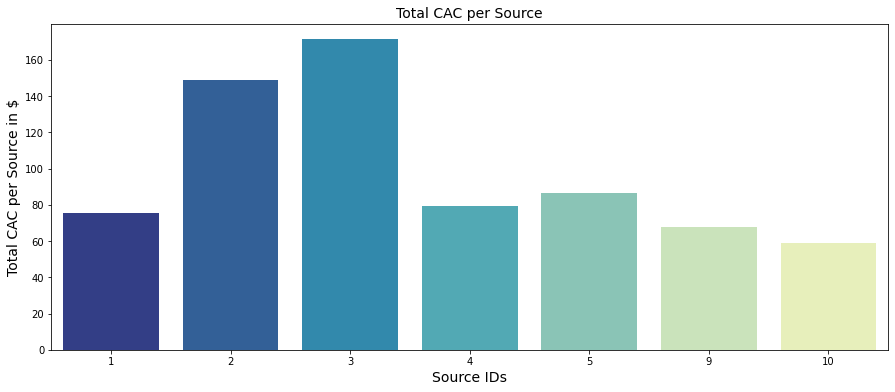

In [73]:
cac_pivot = month_source_cac.groupby(['source_id']).agg({'cac': 'sum'}).reset_index()
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='source_id',y="cac", palette=sns.color_palette('YlGnBu_r', 7), data=cac_pivot)
plt.title("Total CAC per Source",size=14)
plt.xlabel("Source IDs",size=14)
plt.ylabel("Total CAC per Source in $",size=14)
plt.show()


Examining CAC per source, we can see that sources 2 and 3 are the most expansive of the sources. Sources 9 and 10 are the least expansive. 

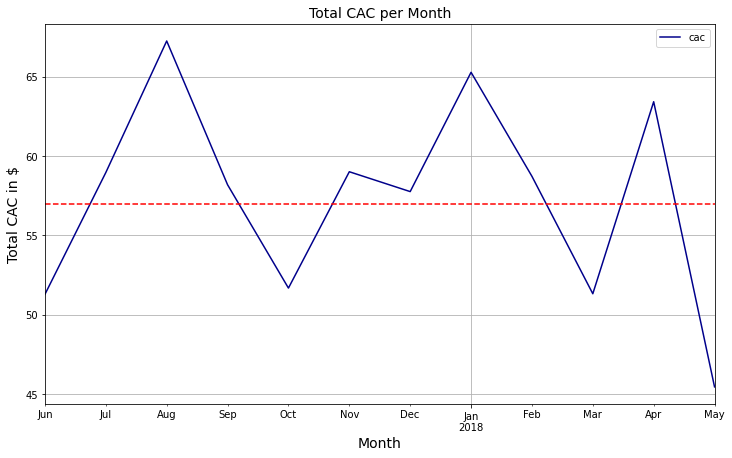

In [74]:
month_source_cac.groupby(['month']).agg({'cac': 'sum'}).plot(grid = True, figsize = (12, 7), color = 'darkblue')
plt.title("Total CAC per Month",size=14)
plt.xlabel("Month",size=14)
plt.ylabel("Total CAC in $",size=14)
plt.axhline( y=int((month_source_cac.groupby(['month']).agg({'cac': 'sum'})).mean()), ls='--',color="red")
plt.show()

Examining CAC per month, we can see that August, January and April had the highest CAC of the months. October and March were had the lowest. Remember that June-August and April had the least amount of users per month. November, the month were usage peaked has just above average CAC. 

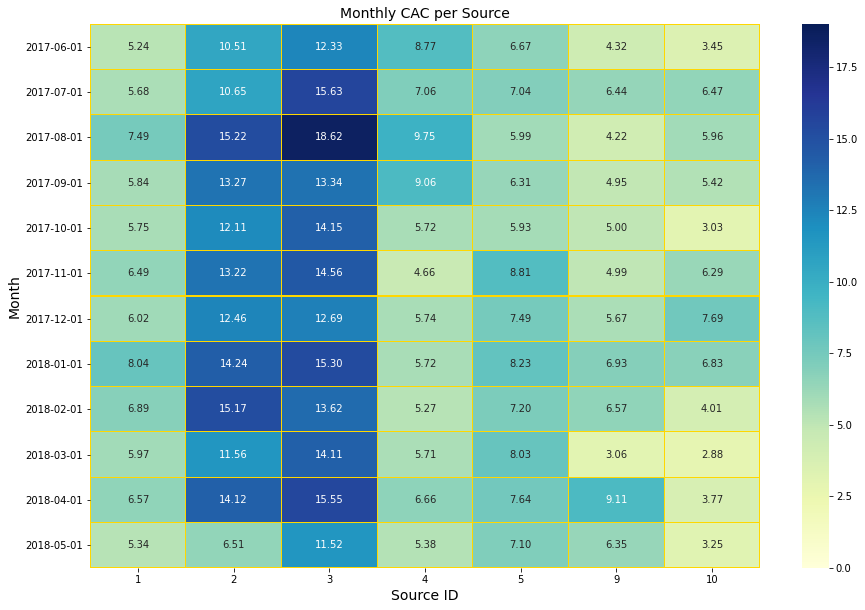

In [75]:
cac_per_source = month_source_cac.pivot_table(index = ['month'], columns = 'source_id', values = 'cac', aggfunc = 'sum')
cac_per_source.index = cac_per_source.index.astype(str)
plt.figure(figsize=(15, 10))
plt.title('Monthly CAC per Source', size=14)
sns.heatmap(cac_per_source,annot=True,fmt='.2f',linewidths=.1,linecolor='gold',cmap="YlGnBu", vmin=0, vmax=19)
plt.xlabel("Source ID", size=14) 
plt.ylabel("Month", size=14) 
plt.show()

Examining CAC per source per month, we can see that sources 2 and 3 had the highest CAC. Source 10 had the lowest CAC per month with Source 9 close behind with only one month with higher than usual CAC (April).

Overall, May had the lowest CAC for all sources, with source 3 having the highest CAC of source but this month was its lowest CAC. Another notable month is October, overall low CAC, with the exception of sources 2 and 3. 

### Return On Investment, AKA "ROI"

Hereinafter I will examine the return on investment (ROI). ROI is a performance measure used to evaluate the efficiency of an investment or compare the efficiency of several investments.

In [76]:
cac_per_month_roi = month_source_cac[['month','cac']]
cac_per_month_roi.columns = ['first_order_month','cac']

I created a new table called "cac per month roi" using only the "month" and "cac" columns from the "month source cac" table. I renamed the columns "first order month" and "cac". 

In [77]:
cohort_ltv = cohort_ltv.rename(columns={'n_buyers': 'cohort_buyers'})


I renamed the "n buyers" column of the "cohort ltv" table. 

In [78]:
ROI = cohort_ltv.merge(cac_per_month_roi,on=['first_order_month'], how='left')
ROI['roi']=ROI['ltv']/ROI['cac']
ROI.head()

,first_order_month,order_month,revenue,cohort_buyers,cohort_lifetime,ltv,cac,roi
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,5.235395,0.902399
1,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,10.508139,0.449596
2,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,12.331180,0.383127
3,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,8.765087,0.539004
4,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,6.673776,0.707907


I merged the "cac per month roi" table and the "cohort ltv" table of the "first order month". I calculated the return on investment (roi) in the "roi" column, by dividing the ltv by the cac, and printed a sample of the merged table. Hereinafter I will create a pivot table of the "roi" table.

#### ROI per Cohort

Hereinafter I will study the ROI per cohort.

In [79]:
roi_piv = ROI.pivot_table(
    index='first_order_month' , columns='cohort_lifetime', values='roi', aggfunc='mean'
).cumsum(axis=1).round(2) 


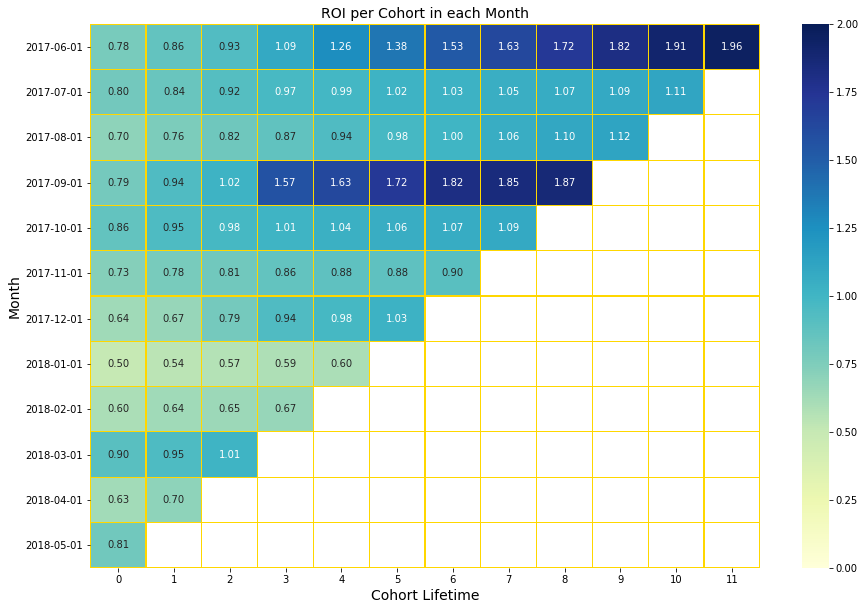

In [80]:
roi_piv.index=roi_piv.index.astype(str)
plt.figure(figsize=(15, 10))
plt.title('ROI per Cohort in each Month', size=14)
sns.heatmap(roi_piv,annot=True,fmt='.2f',linewidths=.1,linecolor='gold',cmap="YlGnBu", vmin=0, vmax=2)
plt.xlabel("Cohort Lifetime", size=14) 
plt.ylabel("Month", size=14) 
plt.show()

As we can see from the heatmap above:
* The September 2017 and March 2018 had a slight ROI by the 2nd lifetime.
* The June 2017 cohort had ROI beginning with the 3rd lifetime, with ROI on the 4th lifetime (November).
* The September 2017 cohort had especially high ROI in the 3rd lifetime (December), and then continued to have steady ROI. 
* The July 2017 had very little ROI beginning with the 5th lifetime, the August 2017 cohort from 7th lifetime, as did the October 2017, December 2017 and March 2018 cohorts.
* The November 2017, January 2018, February 2018 and April 2018 had no ROI. 


#### ROI per Source

Hereinafter I will study the ROI per source.

In [81]:
ltv_per_source=orders.groupby(['first_source'])['uid','revenue'].agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_per_source.columns=['source_id', 'n_buyers','revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['n_buyers']
roi_per_source=costs_pivot.merge(ltv_per_source,on=['source_id'])
roi_per_source['cac']=roi_per_source['costs']/roi_per_source['n_buyers']
roi_per_source['roi']=roi_per_source['ltv']/roi_per_source['cac']
roi_per_source


,source_id,costs,n_buyers,revenue,ltv,cac,roi
0,1,20833.27,3343,35436.83,10.600308,6.231908,1.700973
1,2,42806.04,3537,44346.68,12.537936,12.102358,1.035991
2,3,141321.63,10109,51943.55,5.138347,13.979783,0.367556
3,4,61073.60,10015,55381.50,5.529855,6.098213,0.906799
4,5,51757.10,7164,54783.88,7.647108,7.224609,1.058480
5,9,5517.49,1049,5517.67,5.259933,5.259762,1.000033
6,10,5822.49,1305,4645.87,3.560054,4.461678,0.797918


Above, I created a table called "ltv per source" by grouping the "first source" column, counting the number of unique users for each source and its revenue. I renamed the columns. Then, I created another table, "roi per source", by merging the "ltv per source" table with the previously created "costs pivot" table, on the "source id" column. 

Once the tables were merged, I calculated the ltv, cac and roi per source and printed the table. 

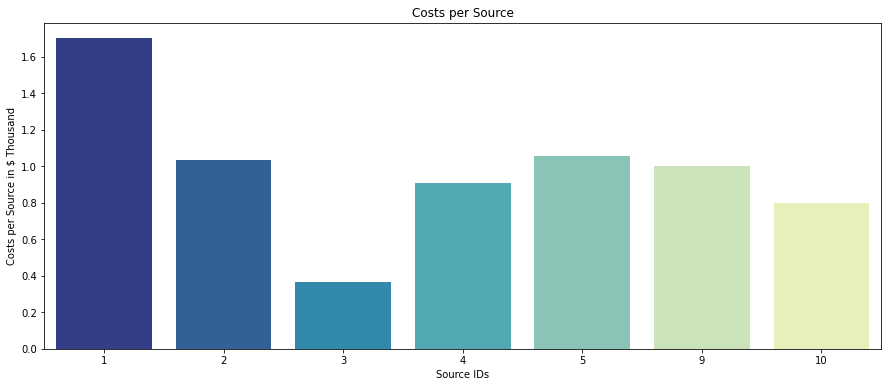

In [82]:
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='source_id',y="roi", palette=sns.color_palette('YlGnBu_r', 7), data=roi_per_source)
plt.title("Costs per Source")
plt.xlabel("Source IDs")
plt.ylabel("Costs per Source in $ Thousand")
plt.show()

Above we can see each source's ROI. Source 1 had, by far, the highest ROI. Source 5 had the second highest ROI, then Sources 2 and 9. Source 3 had the least ROI of all sources. 


#### ROI per Source by Cohort

Hereinafter I will study the ROI per source by cohort. 

In [83]:
orders_ = orders[['uid', 'revenue', 'first_order_month', 'cohort_lifetime', 'first_source']]
orders_ = orders_.groupby(['cohort_lifetime', 'first_source', 'first_order_month']).agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
costs_ = costs[['source_id', 'dt_month', 'costs']]
costs_ = costs_.groupby(['source_id', 'dt_month']).agg({'costs':'sum'}).reset_index()


Above, I created a new table called "orders_" using the "uid", "revenue", "first order month", "cohort lifetime" and "first source" from the "orders" data frame, then I grouped by "first order month", "cohort lifetime" and "first source" columns to calculate the number of unique buyers and the total revenue. 
Then I did the same with the "costs" data frame, creating a new table from the "source id", "dt month" and "costs" columns. In the new table "costs_", I grouped by the "source id" and "dt month" to calculate the total costs for each source each month. 

In [84]:
co = cohort_ltv[['first_order_month', 'cohort_lifetime', 'cohort_buyers']]
ltv_cohorts = orders_.merge(co, on=['first_order_month', 'cohort_lifetime'], how='left')
ltv_cohorts['ltv'] = ltv_cohorts['revenue']/ltv_cohorts['cohort_buyers']


I created a table called "co" using the "first order month", "cohort lifetime" and "cohort buyers" from the previously created "cohort ltv" table. I merged this table to the "orders_" table on the "first order month" and "cohort lifetime" and calculated the ltv by dividing the revenue by the cohort buyers. 

In [85]:
costs_ = costs_.rename(columns={'dt_month': "first_order_month"})
ltv_cohorts = ltv_cohorts.rename(columns={'first_source': "source_id"})
roi_cohorts = costs_.merge(ltv_cohorts, on=['first_order_month', 'source_id'], how='left')


I renamed the "dt month" column in the "costs_" table and merged the table with the previously created "ltv cohorts", I called the new table "roi cohorts".

In [86]:
roi_cohorts['cac'] = roi_cohorts['costs']/roi_cohorts['cohort_buyers']
roi_cohorts['roi'] = roi_cohorts['ltv']/roi_cohorts['cac']
roi_cohorts.head()


,source_id,first_order_month,costs,cohort_lifetime,uid,revenue,cohort_buyers,ltv,cac,roi
0,1,2017-06-01,1125.61,0,215,1354.90,2023,0.669748,0.556406,1.203703
1,1,2017-06-01,1125.61,1,15,294.48,2023,0.145566,0.556406,0.261618
2,1,2017-06-01,1125.61,2,9,386.90,2023,0.191251,0.556406,0.343725
3,1,2017-06-01,1125.61,3,8,634.13,2023,0.313460,0.556406,0.563366
4,1,2017-06-01,1125.61,4,12,397.21,2023,0.196347,0.556406,0.352884


In the new table I calculated the cac and the roi, by first dividing costs by the cohort buyers and then dividing the ltv by the cac. I printed a sample of the table. 

Below, I will create a pivot table to examine each cohorts' roi per source and display it in heatmaps. 

In [87]:
def roi_source(x, y):
    so_roi = roi_cohorts.query(x).pivot_table(
        index='first_order_month' , columns='cohort_lifetime', values='roi', aggfunc='mean'
    ).cumsum(axis=1).round(2)
    so_roi.index = so_roi.index.astype(str)
    plt.figure(figsize=(15, 10))
    sns.heatmap(so_roi ,annot=True,fmt='.2f',linewidths=.1,linecolor='gold',cmap="YlGnBu", vmin=0, vmax=4)
    plt.title("ROI for Source {} per Cohort in each Lifetime".format(y))
    plt.xlabel("Cohort Lifetime", size=14) 
    plt.ylabel("Cohorts", size=14) 
    plt.show()

I created a function that creates a heatmap for the roi of each source per cohort. 

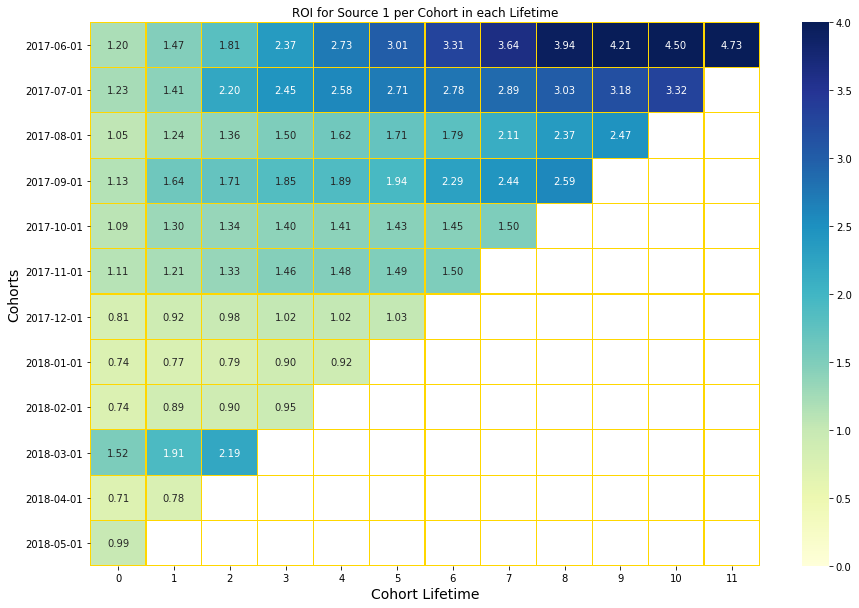

In [88]:
roi_source(x='source_id == 1', y=1)

For source 1, we can see that there was an instant roi for most of the cohorts except for the December 2017, January 2018, February 2018, April 2018 and May 2018 cohorts. Of these cohorts, only the December 2018 cohort had some roi beginning with the 3rd lifetime, while the other cohorts had no roi at all. 

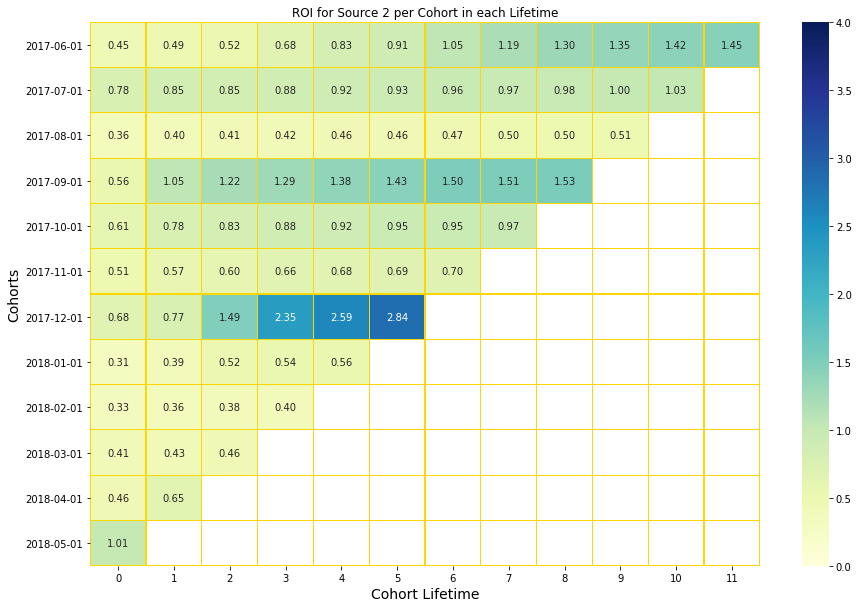

In [89]:
roi_source(x='source_id == 2', y=2)

For source 2, we can see that the June 2017, September 2017 and December 2017 cohorts were the most profitable. However, it took the June 2017 6 months to have any roi while the September 2017 cohort had roi after one month and the December 2017 after two. 

The July 2017 also had roi, but very little, and only after 9 months and the rest of the cohorts had no roi at all. 

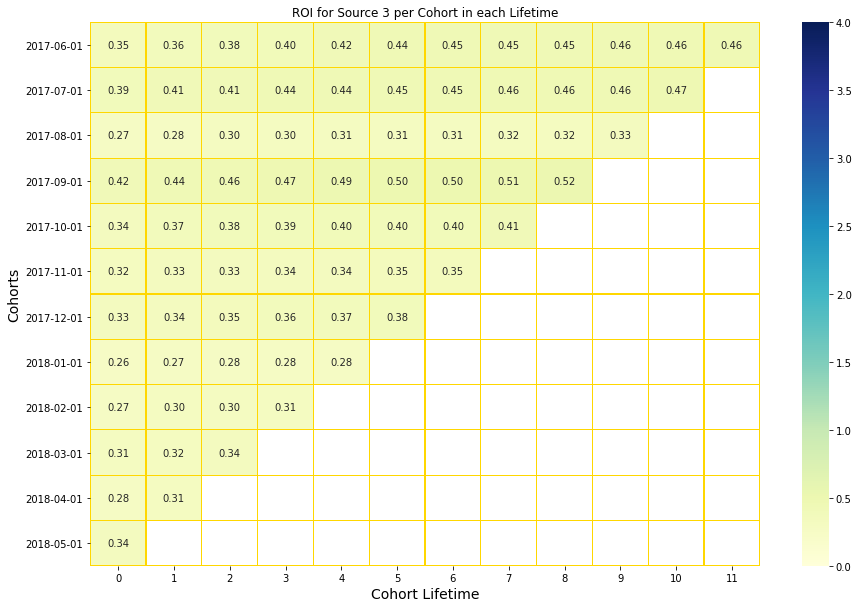

In [90]:
roi_source(x='source_id == 3', y=3)

As expected, we can see that no cohort had roi from source 3 - the most expansive source and the one with the highest cac. This source did not pay off. 

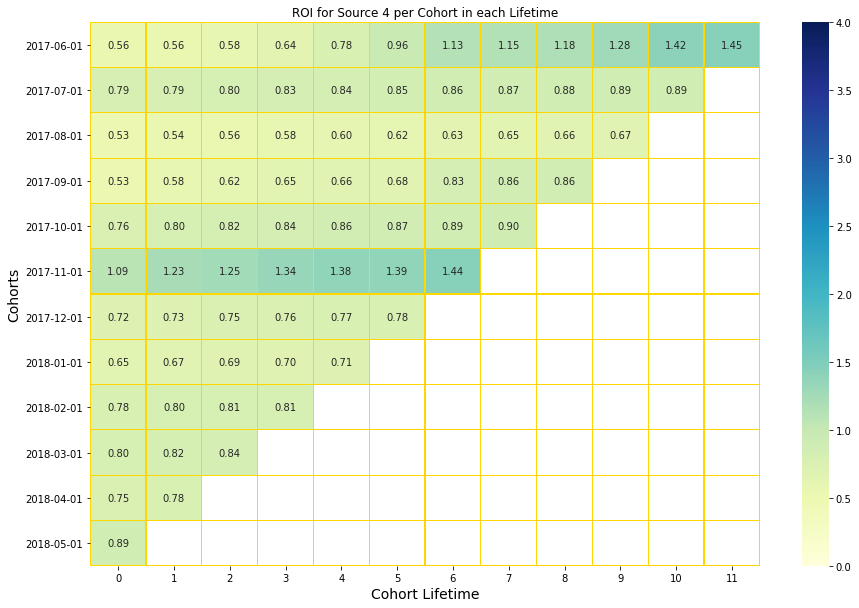

In [91]:
roi_source(x='source_id == 4', y=4)

For source 4, we can see that only two cohorts had roi - the June 2017 cohort and the November 2017 cohort, with former having roi after 6 months and latter instantly. The rest of the cohorts had no roi.

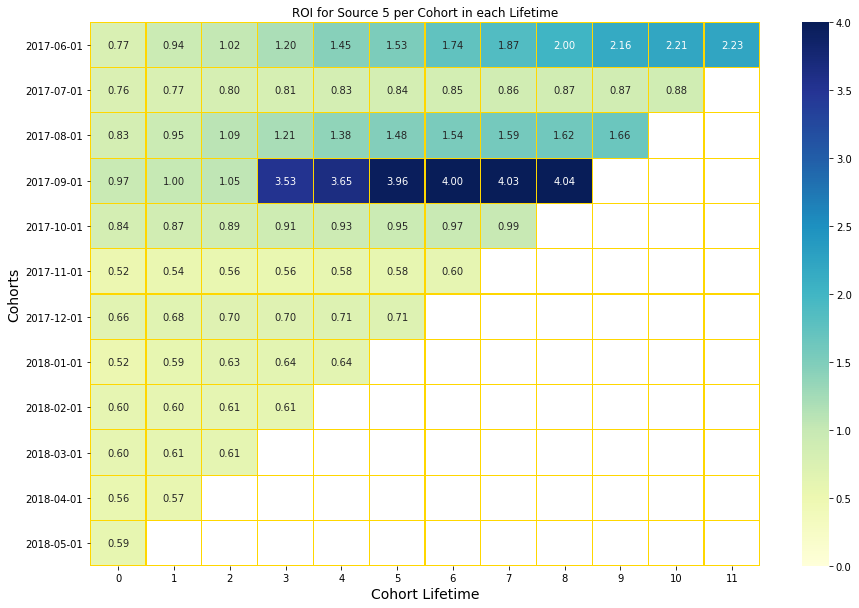

In [92]:
roi_source(x='source_id == 5', y=5)

For source 5, we can see that while some cohorts have extremely high roi, others had none. The June 2017 cohorts had its second highest roi overall, as did the August 2017 cohort. Meanwhile, the September 2017 had its highest roi while the rest of the cohorts had no roi at all. 

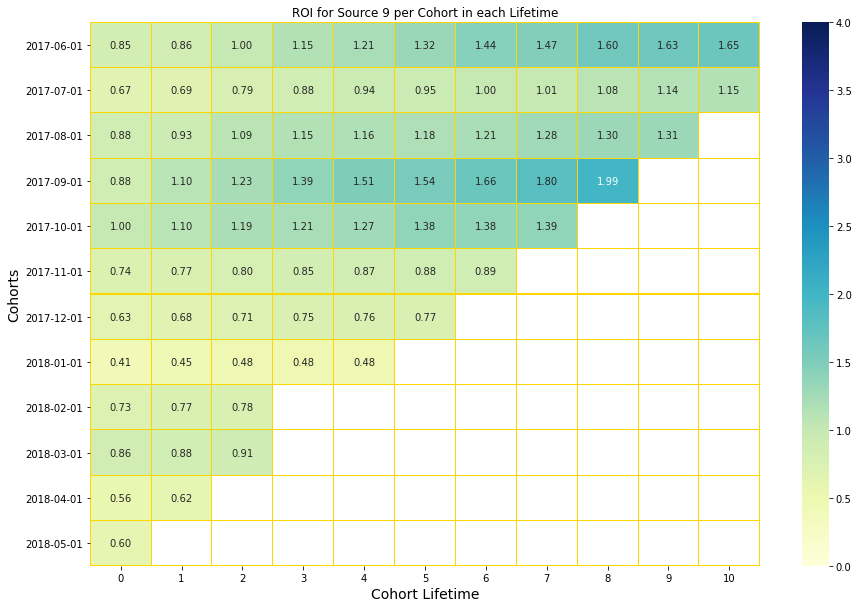

In [93]:
roi_source(x='source_id == 9', y=9)

For source 9, the June-October 2017 cohorts had roi, while the others had no roi. 
The July 2017 cohort took awhile to be profitable (7 months), the June 2017 cohort had roi after 3 months, the August 2017 cohort 2 months, September 2017 one month and the October 2017 cohort was even the first month and was profitable for the rest of its lifetime. 

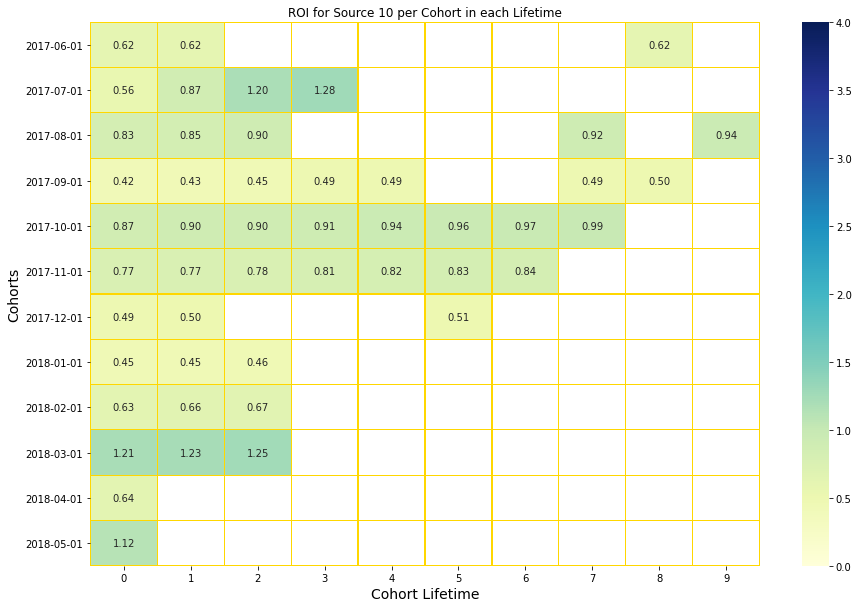

In [94]:
roi_source(x='source_id == 10', y=10)

For source 10, we can see the that it was only partially profitable for some cohorts - for the July 2017 cohort during September and October, for the March 2017 cohort in March-May and for the May cohort on its first and only lifetime. For the rest of the cohorts there was no roi at all. 

### Conclusions



**Costs** 

* 3 sources' costs were above average (sources 3, 4 and 5) with source 3 being the most expansive, and by a lot. 
* Sources 2, 4 and 5 are either slightly below average or slightly above average and sources 1, 9 and 10 are the least expansive.
* Each of the most expansive sources were the most expansive both in 2017 and in 2018, and that consistently, 2017 was more expansive for all source than 2018. Sources 3, 4 and 5's costs were above average in each year. 

**Monthly costs for each source:**

* Sources 1, 2 and 10 were the least expansive sources, consistently. With sources 1 and 2 expanses rising from August to January, source 2 dipping slightly in January and then both mostly declining in expanses. 
* Source 3 is the most expansive, with costs dipping in August and then costs hike and peak in November only to start declining. 
* Sources 4 and 5 are the second and third most expansive sources, with source 4's costs dipping in November and peaking in October, December and March, while source 5's costs were the highest in November and the lowest in August. 
* Overall, other than source 10, we can see that for all sources, the least amount of costs invested were in August and April.
* We can see that source 3 had the highest average monthly costs, more than twice as much as the second highest (source 4) and almost 3 times as the 3rd highest (source 5). The source with the lowest average monthly cost was source 9.  

**Weekly costs for each source:**

* Source 3 is the most expansive source, that the week before last in November was its most expansive week.
* Sources 3 and 4 were the most erratic, dipping and hiking in costs constantly. 
* Sources 1, 2 and 5 are quite similar, peaking in mid-July, mid-November, mid-March and dipping in late March. 
* The costs of source 9 and 10 overlap and are the least erratic. 
* Source 3 had the highest average weekly costs, twice as much as the second highest source (source 4) and almost twenty times as much as source 9 and 10.

**CAC** 

* CAC per source, we can see that sources 2 and 3 are the most expansive of the sources. Sources 9 and 10 are the least expansive. 
* August, January and April had the highest CAC of the months. October and March were had the lowest. Remember that June-August and April had the least amount of users per month. November, the month were usage peaked has just above average CAC. 
* CAC per source per month - sources 2 and 3 had the highest CAC. Source 10 had the lowest CAC per month with Source 9 close behind with only one month with higher than usual CAC (April).
* Overall, May had the lowest CAC for all sources, with source 3 having the highest CAC of source but this month was its lowest CAC. Another notable month is October, overall low CAC, with the exception of sources 2 and 3. 

**ROI**

**ROI per Cohort:**

* The September 2017 and March 2018 had a slight ROI by the 2nd lifetime.
* The June 2017 cohort had ROI beginning with the 3rd lifetime, with ROI on the 4th lifetime (November).
* The September 2017 cohort had especially high ROI in the 3rd lifetime (December), and then continued to have steady ROI. 
* The July 2017 had very little ROI beginning with the 5th lifetime, the August 2017 cohort from 7th lifetime, as did the October 2017, December 2017 and March 2018 cohorts.
* The November 2017, January 2018, February 2018 and April 2018 had no ROI. 

**ROI per Source:**

* Source 1 had, by far, the highest ROI. Source 5 had the second highest ROI, then Sources 2 and 9. Source 3 had the least ROI of all sources.

**ROI per Source per Cohort:**
* Source 1 - instant roi for most of the cohorts except for the December 2017, January 2018, February 2018, April 2018 and May 2018 cohorts. Of these cohorts, only the December 2018 cohort had some roi beginning with the 3rd lifetime, while the other cohorts had no roi at all. 
* Source 2, we can see that the June 2017, September 2017 and December 2017 cohorts were the most profitable. However, it took the June 2017 6 months to have any roi while the September 2017 cohort had roi after one month and the December 2017 after two. The July 2017 also had roi, but very little, and only after 9 months and the rest of the cohorts had no roi at all. 
* Source 3 - no cohort had roi from source 3 - the most expansive source and the one with the highest cac. This source did not pay off. 
* Source 4 - only two cohorts had roi - the June 2017 cohort and the November 2017 cohort, with former having roi after 6 months and latter instantly. The rest of the cohorts had no roi.
* Source 5 - while some cohorts have extremely high roi, others had none. The June 2017 cohorts had its second highest roi overall, as did the August 2017 cohort. Meanwhile, the September 2017 had its highest roi while the rest of the cohorts had no roi at all.
* Source 9 - the June-October 2017 cohorts had roi, while the others had no roi. The July 2017 cohort took awhile to be profitable (7 months), the June 2017 cohort had roi after 3 months, the August 2017 cohort 2 months, September 2017 one month and the October 2017 cohort was even the first month and was profitable for the rest of its lifetime. 
* Source 10 - only partially profitable for some cohorts - for the July 2017 cohort during September and October, for the March 2017 cohort in March-May and for the May cohort on its first and only lifetime. For the rest of the cohorts there was no roi at all. 



## General Conclusions and Summary 

**Initial Exploration of the Data**
* There are no missing values and the data type of the values in each of the data frames is correct.
* The names of the columns of the "orders" and "visits" data frames need to be turned to lowercase letters and spaces between words to underscores. 
* The minimum date in each of the data frames is June 1, 2017. The maximum date is either May 31, 2018, or June 1, 2018 (during the night between May 31 and June 1). 
* Each of the data frames have a different amount of columns and rows, the most substantial data frames is "visits" with 359,400 rows. 
* There are 10 source IDs and 2 types of devices, of which "desktop" is the most frequent. 

**Data Preprocessing**
* Turned the names of the "orders" data frame columns to lower case and changed the space between words to underscore.
* There was only one order in June 1, 2018.
* Turned the names of the "visits" data frame columns to lower case and changed the space between words to underscore.
* Located two rows in the "visits" data frame where the beginning of the visits was later than its end. I deleted these two rows and checked again if there are such visits in the data frame.
* In the end of this section there were 359,398 rows in the "visits" data frame, instead of 359,400 rows.

**Product Usage**

In this section I examined the users' usage of the product. Mainly, the overall number of users using the product per month, week and day and their numbers per device, the amount of overall session and per device, the overall length of each session and per device and user retention. 
* Created four new columns in the "visits" data frame: session year, session month, session week and session date (the visit's date, not timestamp).

**Concluded the Following:**

* Calculated overall MAU, WAU and MAU and per device and compared the two, both total numbers and average users per month, week and day. 
* Concluded that the number of active users in June 2017-August 2017 was well below average, dipping to its lowest point around August. Once Summer has ended, the number of active users steadily rises and peaks in November-December (during the holidays). Then the number of users declines again.
* The desktop usage is very similar to overall usage in slightly lower numbers. However, while there a far fewer touch users, they seem to be more reliable and constant users than the desktop users who seem more erratic in usage and more affected by seasonality. Touch users use the product throughout the year with a slight peak during the holidays and a slight dip in mid-late March. 
* Most likely reason for such a huge difference between desktop users and touch users is the accessibility of the product with touch, i.e. **user experience**. 

**Product Sales**

In this section I examined the users' orders using the product, when they turn from users to customers. Mainly, the customers' conversion rate, the amount of orders the customers made over time and their size and the customers' lifetime value.
* Created two new tables - one with each user's first purchase and one with their first visit and merged them into one table called "first visit order", and renamed the columns to reflect their content. Then, I turned the first visit and first order dates to months (first day of the month, the month and year), and subtracted the first visit month from the first order month and saved the result in the "days to conversion" column and turn the difference to days. I will hereinafter group the users by their days to conversion. 
* Created four new columns in the "orders" data frame, "order year", "order month", "order week" and "order date". I renamed the columns in the previously created "first order" table and merged it with the "orders" data frame. Then, created a new column called "first order month", with the month of each user's first order and another column, "cohort lifetime", with the difference between each user's order month and the month of the first placed order. I grouped the "first order month" and "cohort lifetime" columns, counted the unique number of users and the number of orders placed. I saved the results in a new table, "cohorts o". Then I created another table with only the 0 cohort lifetime number of unique users of each cohort and renamed the column "co uid". I merged the "cohorts o" and the "initial count o" tables, rename the "order month" column to reflect the number of orders placed in each month and divided the number of orders placed by the cohort size. I saved the results in the column "orders per user" and printed a sample of the table.
* I created a table with the size of each cohort called "cohort s" and renamed the table's columns and created another table grouping the "first order month" and "order month" columns and the aggregated revenue for each order month. I merged the "cohort s" and "cohort ltv" tables and printed a sample of the table with a column with each cohort's lifetime buy subtracting the first order month from the order month. In the "cohort ltv" table I created a new column called "ltv" by dividing the revenue by the number of buyers. Usually, the gross profit (revenue multiplied by the margin rate) is divided by the number of buyers, but since we don't have any information regarding the margin rate the gross profit is the revenue. 

**Concluded the Following:**

**Conversion Rate** 
* A total of 228,169 users visited the product and only 36523 of these users placed orders - the conversion rate is 16.01%. 
* 82.38% of orders were placed in the users' first visit.
* The average time it takes a user to become a customer is 16.6 days.

**Orders per Period**

* The average daily numbers: 127 users and and 138 orders. 
* The average weekly numbers: 818 users and and 951 orders. 
* The average monthly numbers: 3155 users and and 3878 orders.
* Most order are made in the first lifetime of each cohort.
* The customers of the June 2017 cohort had the most cumulative number of orders per customer, but from around March 2018 (cohort lifetime 8) the number of orders decreased (after peaking in October-December 2018). 
* For cohort August 2017, the biggest rise in the number of orders per customer was in September and October 2017, and for the November 2017 cohort - December 2017.

**Average Order Size**


    
* December had the highest average order size. March 2018, September 2017 and July 2017 were also above the overall average order size per month. 
* October and August's average order size were slightly above the overall average order size per month and 
November slighlty below. 
* June 2017 and January 2018 had the lowest average order size.
* The average order size of each cohort is fairly similar. 
* There are some cohorts with higher than average order sizes (e.g., the June 2017 cohort, the July 2017 cohort, the September 2017 cohort and the December 2017 cohort). 
* Possible explanation for the aforementioned is few users who made more expansive purchases.
* The September 2017 and December 2017 cohorts had the highest average order sizes of all cohorts.

**LTV**
* Each of the cohorts' highest LTV is in the first lifetime month. 
* The customers of the September 2017 cohort brought the company, on average, the highest revenue. 
* A close second is the June 2017, even though it had the longest cohort lifetime.

**Marketing Investment**
In this section I examined the company's marketing investment - marketing overall costs/per source, customer acquisition cost (CAC) and return on investment (ROI). 

**Costs per Source** 

* From the "dt" column in the "costs" data frame I created three new columns: dt_year, dt_month and dt_week.
* Sources 3, 4 and 5 are the most expansive. Source 3 racking up the most costs of all sources, by a lot. 
* Sources 2, 4 and 5 are either slightly below average or slightly above average and sources 1, 9 and 10 are the least expansive. 

**Monthly costs for each source:**

* Sources 1, 2 and 10 were the least expansive sources, consistently. With sources 1 and 2 expanses rising from August to January, source 2 dipping slightly in January and then both mostly declining in expanses. 
* Source 3 is the most expansive, with costs dipping in August and then costs hike and peak in November only to start declining. 
* Sources 4 and 5 are the second and third most expansive sources, with source 4's costs dipping in November and peaking in October, December and March, while source 5's costs were the highest in November and the lowest in August. 
* Overall, other than source 10, we can see that for all sources, the least amount of costs invested were in August and April.
* We can see that source 3 had the highest average monthly costs, more than twice as much as the second highest (source 4) and almost 3 times as the 3rd highest (source 5). The source with the lowest average monthly cost was source 9.  

**Weekly costs for each source:**
* Source 3 is the most expansive source, that the week before last in November was its most expansive week.
* Sources 3 and 4 were the most erratic, dipping and hiking in costs constantly. 
* Sources 1, 2 and 5 are quite similar, peaking in mid-July, mid-November, mid-March and dipping in late March. 
* The costs of source 9 and 10 overlap and are the least erratic. 
* Source 3 had the highest average weekly costs, twice as much as the second highest source (source 4) and almost twenty times as much as source 9 and 10.

**CAC**
* Checked the different source id's in the "costs" data frame and the "visits" data frame - sources 6 and 7 generated visits but no costs.
* Grouped the users in the "visits" data frame and counted how many sources each had. Note that some users may have visits originating in different sources and created a table with each user's first visit source called "first source" and merged it into the "orders" data frame on the "uid" column. Then, I created a pivot table of the "costs" data frame, calculating each month's and source id's costs. I saved the table as "monthly costs" and grouped the "orders" data frame by the users' first order month (cohort) and first source and counted the number of unique users. I saved the table as "monthly orders". Finally, I merged the two above mentioned tables on the month and source id columns and saved it as "month source cac". Then I calculated each cohort's cac.

**Concluded the Following:**

* CAC per source, we can see that sources 2 and 3 are the most expansive of the sources. Sources 9 and 10 are the least expansive. 
* August, January and April had the highest CAC of the months. October and March were had the lowest. Remember that June-August and April had the least amount of users per month. November, the month were usage peaked has just above average CAC. 
* CAC per source per month - sources 2 and 3 had the highest CAC. Source 10 had the lowest CAC per month with Source 9 close behind with only one month with higher than usual CAC (April).
* Overall, May had the lowest CAC for all sources, with source 3 having the highest CAC of source but this month was its lowest CAC. Another notable month is October, overall low CAC, with the exception of sources 2 and 3. 

**ROI**
* created a new table called "cac per month roi" using only the "month" and "cac" columns from the "month source cac" table. I renamed the columns "first order month" and "cac" and renamed the "n buyers" column of the "cohort ltv" table. Then, I merged the "cac per month roi" table and the "cohort ltv" table of the "first order month". I calculated the return on investment (roi) in the "roi" column, by dividing the ltv by the cac, and printed a sample of the merged table. Hereinafter I will create a pivot table of the "roi" table. 

**Concluded the Following:**

**ROI per Cohort:**
* The September 2017 and March 2018 had a slight ROI by the 2nd lifetime.
* The June 2017 cohort had ROI beginning with the 3rd lifetime, with ROI on the 4th lifetime (November).
* The September 2017 cohort had especially high ROI in the 3rd lifetime (December), and then continued to have steady ROI. 
* The July 2017 had very little ROI beginning with the 5th lifetime, the August 2017 cohort from 7th lifetime, as did the October 2017, December 2017 and March 2018 cohorts.
* The November 2017, January 2018, February 2018 and April 2018 had no ROI. 

**ROI per Source:**
* I created a table called "ltv per source" by grouping the "first source" column, counting the number of unique users for each source and its revenue. I renamed the columns. Then, I created another table, "roi per source", by merging the "ltv per source" table with the previously created "costs pivot" table, on the "source id" column. Once the tables were merged, I calculated the ltv, cac and roi per source and printed the table. 
* Source 1 had, by far, the highest ROI. Source 5 had the second highest ROI, then Sources 2 and 9. Source 3 had the least ROI of all sources.


**ROI per Source per Cohort:**

* I created a new table called "orders_" using the "uid", "revenue", "first order month", "cohort lifetime" and "first source" from the "orders" data frame, then I grouped by "first order month", "cohort lifetime" and "first source" columns to calculate the number of unique buyers and the total revenue. Then, I did the same with the "costs" data frame, creating a new table from the "source id", "dt month" and "costs" columns. In the new table "costs_", I grouped by the "source id" and "dt month" to calculate the total costs for each source each month. 
* Then, I created another table called "co" using the "first order month", "cohort lifetime" and "cohort buyers" from the previously created "cohort ltv" table. I merged this table to the "orders_" table on the "first order month" and "cohort lifetime" and calculated the ltv by dividing the revenue by the cohort buyers. I renamed the "dt month" column in the "costs_" table and merged the table with the previously created "ltv cohorts", I called the new table "roi cohorts".
* In the new table I calculated the cac and the roi, by first dividing costs by the cohort buyers and then dividing the ltv by the cac. Finally, I created a pivot table to examine each cohort's roi per source and display it in heatmaps:
* Source 1 - instant roi for most of the cohorts except for the December 2017, January 2018, February 2018, April 2018 and May 2018 cohorts. Of these cohorts, only the December 2018 cohort had some roi beginning with the 3rd lifetime, while the other cohorts had no roi at all. 
* Source 2, we can see that the June 2017, September 2017 and December 2017 cohorts were the most profitable. However, it took the June 2017 6 months to have any roi while the September 2017 cohort had roi after one month and the December 2017 after two. The July 2017 also had roi, but very little, and only after 9 months and the rest of the cohorts had no roi at all. 
* Source 3 - no cohort had roi from source 3 - the most expansive source and the one with the highest cac. This source did not pay off. 
* Source 4 - only two cohorts had roi - the June 2017 cohort and the November 2017 cohort, with former having roi after 6 months and latter instantly. The rest of the cohorts had no roi.
* Source 5 - while some cohorts have extremely high roi, others had none. The June 2017 cohorts had its second highest roi overall, as did the August 2017 cohort. Meanwhile, the September 2017 had its highest roi while the rest of the cohorts had no roi at all.
* Source 9 - the June-October 2017 cohorts had roi, while the others had no roi. The July 2017 cohort took awhile to be profitable (7 months), the June 2017 cohort had roi after 3 months, the August 2017 cohort 2 months, September 2017 one month and the October 2017 cohort was even the first month and was profitable for the rest of its lifetime. 
* Source 10 - only partially profitable for some cohorts - for the July 2017 cohort during September and October, for the March 2017 cohort in March-May and for the May cohort on its first and only lifetime. For the rest of the cohorts there was no roi at all. 











## Recommendations

* Check and improve user experience through "touch", even though this device generate fewer users than "desktop", these users are more reliable and less affected by seasonality. Desktop users are too erratic and unreliable while touch users use the product consistently but in fewer numbers - we should increase the number of users using touch.
* The first-month retention rate is steady for 5 of the first 6 cohorts and especially high for the September 2017 cohort, 7.7%-7.9% and 8.5%, respectively. Whereas the first-month retention rate for the cohorts that joined in July 2017 and between December 2017 and April 2018 was 4.2%-6%. It is worth checking the sources for these cohorts. 
* Source 3 is the most expansive and generates no ROI at all - I recommend dropping this source, this source doesn't pay off at all across all cohorts, no matter how money is invested in it. 
* I recommend investing in source 1 and 9 - source 1 has the highest roi consistently with source 9, although it has lower roi, it is the most consistent across all cohorts (taking into account the some cohorts take time to generate roi). 
* Sources 4 and 10 seem to be closer to generating roi/generating roi by March 2018, this is worth further investigation and perhaps more investing to build on the positive signs.  